# Data Modelling

## Importing the libraries

In [437]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing data from a csv

In [438]:
pd.options.display.max_columns = None

In [439]:
df_loan = pd.read_csv('/content/drive/MyDrive/Python/loan_data_2007_2014.csv')
df_loan.head()

<ipython-input-439-12289ff8c657>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv('/content/drive/MyDrive/Python/loan_data_2007_2014.csv')


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [440]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Cleaning Data

Changing variables types

In [441]:
df_loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [442]:
df_loan['emp_length_int'] = df_loan['emp_length'].str.replace("\+ years", "")
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\< 1 year", str(0))
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace('n/a', str(0))
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ years", "")
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ year", "")

<ipython-input-442-4110cd9adc17>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length'].str.replace("\+ years", "")
<ipython-input-442-4110cd9adc17>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\< 1 year", str(0))
<ipython-input-442-4110cd9adc17>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ years", "")
<ipython-input-442-4110cd9adc17>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ year", "")


In [443]:
df_loan['emp_length_int'].fillna(0, inplace=True)
df_loan['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', 0],
      dtype=object)

In [444]:
# Numbers still strings
df_loan['emp_length_int'] = pd.to_numeric(df_loan['emp_length_int'])
df_loan['emp_length_int'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [445]:
df_loan['emp_length_int'].dtypes

dtype('int64')

Variable 'Employment length in years' now is a integer number, going to another variable.

In [446]:
df_loan['earliest_cr_line'].unique() #should be a date variable

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [447]:
df_loan['earliest_cr_line_date'] = pd.to_datetime(df_loan['earliest_cr_line'], format='%b-%y')
df_loan['mths_since_earliest_cr_line'] = round( pd.to_numeric( (pd.to_datetime('2017-12-01') - df_loan['earliest_cr_line_date'] ) / np.timedelta64(1, 'M') ))
df_loan['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Somehow it returned a negative value.

In [448]:
df_loan.loc[ : , ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][df_loan['mths_since_earliest_cr_line']<0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -537.0
1770             Sep-68            2068-09-01                       -609.0
2799             Sep-64            2064-09-01                       -561.0
3282             Sep-67            2067-09-01                       -597.0
3359             Feb-65            2065-02-01                       -566.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -601.0
464260           Jul-66            2066-07-01                       -583.0
465100           Oct-67            2067-10-01                       -598.0
465500           Sep-67            2067-09-01                       -597.0
465655           Jan-56            2056-01-01                       -457.0

[1169 rows x 3 columns]

In [449]:
df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] = df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] - pd.DateOffset(years=100)

<ipython-input-449-0a34ac2ec276>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] = df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] - pd.DateOffset(years=100)


looking at the datframe with negatives values, you can see that the convertion to the date format went wrong. So I subtract 100 years on those negatives date and I will calculate it again.

In [450]:
df_loan['mths_since_earliest_cr_line'] = round( pd.to_numeric( (pd.to_datetime('2017-12-01') - df_loan['earliest_cr_line_date'] ) / np.timedelta64(1, 'M') ))
df_loan['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.491078
std          86.928944
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

Everything seems to look right. Going to do the same thing to the others variables we are going to use on the models.


In [451]:
df_loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [452]:
df_loan['term_int'] = df_loan['term'].str.replace(' ', '')
df_loan['term_int'] = df_loan['term_int'].str.replace('months', '')

In [453]:
df_loan['term_int'] = pd.to_numeric(df_loan['term_int'])

In [454]:
df_loan['term_int'].dtypes

dtype('int64')

Solved the term length issue. Replaced and converted to integer number.

In [455]:
df_loan['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [456]:
df_loan['issue_date'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y')
df_loan['mths_issue_date'] = round( pd.to_numeric( (pd.to_datetime('2017-12-01') - df_loan['issue_date'] ) / np.timedelta64(1, 'M') )) #Using a random data on then same year of this dataset was extracted
df_loan['mths_issue_date'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_issue_date, dtype: float64

In [457]:
df_loan['issue_date'].unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

In [458]:
df_loan['mths_issue_date'].unique()

array([ 72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.])

Transforming into binaries variables.

In [459]:
pd.get_dummies(df_loan['grade']).head()

A  B  C  D  E  F  G
0  0  1  0  0  0  0  0
1  0  0  1  0  0  0  0
2  0  0  1  0  0  0  0
3  0  0  1  0  0  0  0
4  0  1  0  0  0  0  0

In [460]:
pd.get_dummies(df_loan['grade'], prefix = 'grade', prefix_sep = ':').head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0        0        1        0        0        0        0        0
1        0        0        1        0        0        0        0
2        0        0        1        0        0        0        0
3        0        0        1        0        0        0        0
4        0        1        0        0        0        0        0

In [461]:
loan_data_dummies = [pd.get_dummies(df_loan['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(df_loan['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(df_loan['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(df_loan['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(df_loan['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(df_loan['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(df_loan['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(df_loan['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [462]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
loan_data_dummies.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0        0        1        0        0        0        0        0   
1        0        0        1        0        0        0        0   
2        0        0        1        0        0        0        0   
3        0        0        1        0        0        0        0   
4        0        1        0        0        0        0        0   

   sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:B1  sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  \
0             0             1             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             1   

   sub_grade:C1  sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  \
0             0             0             0             0             0   
1             0             0             0             1             0   
2             0             0             0             0             1   
3             1             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:D1  sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:E1  sub_grade:E2  sub_grade:E3  sub_grade:E4  sub_grade:E5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:F1  sub_grade:F2  sub_grade:F3  sub_grade:F4  sub_grade:F5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:G1  sub_grade:G2  sub_grade:G3  sub_grade:G4  sub_grade:G5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   home_ownership:ANY  home_ownership:MORTGAGE  home_ownership:NONE  \
0                   0                        0                    0   
1                   0                        0                    0   
2                   0                        0                    0   
3                   0                        0                    0   
4                   0                        0                    0   

   home_ow

In [463]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [464]:
df_loan = pd.concat([df_loan, loan_data_dummies], axis = 1) #do a join on the dataframe

In [465]:
df_loan.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

Dealing with missing values.

In [466]:
df_loan.isnull()
pd.options.display.max_rows = None
df_loan.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [467]:
pd.options.display.max_rows = 100

In [468]:
df_loan['total_rev_hi_lim'].fillna(df_loan['funded_amnt'], inplace = True)

In [469]:
df_loan['total_rev_hi_lim'].isnull().sum()

0

Filling with the funded amount column was a sucess

In [470]:
df_loan['annual_inc'].fillna(df_loan['annual_inc'].mean(), inplace=True) # Filling with the mean value, but the rest i will fill with 0

In [471]:
df_loan['annual_inc'].isnull().sum()

0

In [472]:
df_loan['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df_loan['acc_now_delinq'].fillna(0, inplace=True)
df_loan['total_acc'].fillna(0, inplace=True)
df_loan['pub_rec'].fillna(0, inplace=True)
df_loan['open_acc'].fillna(0, inplace=True)
df_loan['inq_last_6mths'].fillna(0, inplace=True)
df_loan['delinq_2yrs'].fillna(0, inplace=True)
df_loan['emp_length_int'].fillna(0, inplace=True)

In [473]:
df_loan['emp_length_int'].isnull().sum()

0

# Calculating the variables for the PD Model

## Targets and inputs

In [474]:
df_loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [475]:
df_loan['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [476]:
df_loan['loan_status'].count()

466285

In [477]:
df_loan['loan_status'].value_counts() / df_loan['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [478]:
df_loan['good_bad'] = np.where(df_loan['loan_status'].isin(['Charged Off','Late (31-120 days)','Default']),  0,  1)

In [479]:
df_loan[['loan_status','good_bad']]

loan_status  good_bad
0        Fully Paid         1
1       Charged Off         0
2        Fully Paid         1
3        Fully Paid         1
4           Current         1
...             ...       ...
466280      Current         1
466281  Charged Off         0
466282      Current         1
466283   Fully Paid         1
466284      Current         1

[466285 rows x 2 columns]

In [480]:
df_loan['good_bad'].sum()

416078

## Splitting Data

In [481]:
train_test_split(df_loan.drop('good_bad', axis = 1), df_loan['good_bad']) #Taking this column out of the train data, this 'good_bad' is the target, so it cannot be used as a variable

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 410262      410262  14278157   16330551      28000        28000   
 191023      191023   1617364    1889201       9325         9325   
 142949      142949   4536453    5778704      10000        10000   
 385168      385168  16592234   18704765       2800         2800   
 336425      336425  22413609   24746303       2200         2200   
 ...            ...       ...        ...        ...          ...   
 289438      289438  29785059   32308305       6950         6950   
 85186        85186   7346037    9008168      15000        15000   
 397162      397162  15490720   17563114      10500        10500   
 343351      343351  21361445   23674278      20000        20000   
 379991      379991  16802510   18915061      18000        18000   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 410262          28000.0   36 months      8.90       889.09     A        A5   
 191023           9300.0

it returned 4 dataframes, so I will apply each to a specific dataframe

In [482]:
df_loan_train, df_loan_test, df_loan_train_target, df_loan_test_target  = train_test_split(df_loan.drop('good_bad', axis = 1), df_loan['good_bad'])

In [483]:
df_loan_train, df_loan_test, df_loan_train_target, df_loan_test_target  = train_test_split(df_loan.drop('good_bad', axis = 1), df_loan['good_bad'], test_size = 0.2, random_state = 42)

In [484]:
df_loan_train.shape

(373028, 207)

In [485]:
df_loan_test.shape

(93257, 207)

In [486]:
df_loan_train_target.shape

(373028,)

In [487]:
df_loan_test_target.shape

(93257,)

## Splitting into 4 DataFrames.

This step will be executed 2 times, one for the train data and one for the test data because they need to have the same variables.


In [602]:
#df_inputs = df_loan_train
#df_targets = df_loan_train_target

df_inputs = df_loan_test
df_targets = df_loan_test_target

In [603]:
df_inputs['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [604]:
df = pd.concat([df_inputs['grade'], df_targets], axis = 1)
df.head()

grade  good_bad
362514     C         1
288564     E         1
213591     C         1
263083     C         1
165001     A         1

In [605]:
df.columns.values[0]

'grade'

In [606]:
df.groupby(df.columns.values[0], as_index = False  )[df.columns.values[1]].count()

grade  good_bad
0     A     15108
1     B     27199
2     C     25048
3     D     15390
4     E      7145
5     F      2699
6     G       668

In [607]:
df1  = pd.concat(
    [df.groupby(df.columns.values[0],  as_index = False)[df.columns.values[1]].count(),
    df.groupby(df.columns.values[0],  as_index = False)[df.columns.values[1]].mean()] , axis=1
)

df1.head()

grade  good_bad grade  good_bad
0     A     15108     A  0.962404
1     B     27199     B  0.923894
2     C     25048     C  0.884103
3     D     15390     D  0.846394
4     E      7145     E  0.808537

In [608]:
df1 = df1.iloc[:,[0,1,3]]

In [609]:
df1.columns = [df1.columns.values[0] , 'n_obs' , 'prop_good']
df1

grade  n_obs  prop_good
0     A  15108   0.962404
1     B  27199   0.923894
2     C  25048   0.884103
3     D  15390   0.846394
4     E   7145   0.808537
5     F   2699   0.783624
6     G    668   0.723054

In [610]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [611]:
df1

grade  n_obs  prop_good  prop_n_obs
0     A  15108   0.962404    0.162004
1     B  27199   0.923894    0.291656
2     C  25048   0.884103    0.268591
3     D  15390   0.846394    0.165028
4     E   7145   0.808537    0.076616
5     F   2699   0.783624    0.028942
6     G    668   0.723054    0.007163

In [612]:
df1['n_good'] = df1.prop_good       * df1.n_obs
df1['n_bad']  = (1 - df1.prop_good) * df1.n_obs
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad
0     A  15108   0.962404    0.162004  14540.0   568.0
1     B  27199   0.923894    0.291656  25129.0  2070.0
2     C  25048   0.884103    0.268591  22145.0  2903.0
3     D  15390   0.846394    0.165028  13026.0  2364.0
4     E   7145   0.808537    0.076616   5777.0  1368.0
5     F   2699   0.783624    0.028942   2115.0   584.0
6     G    668   0.723054    0.007163    483.0   185.0

In [613]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad']  = df1['n_bad']  / df1['n_bad'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   
1     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
2     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
5     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
6     G    668   0.723054    0.007163    483.0   185.0     0.005804   

   prop_n_bad  
0    0.056562  
1    0.206134  
2    0.289086  
3    0.235411  
4    0.136228  
5    0.058156  
6    0.018423

## Calculating the Weight of Evidence of this Categorical Variable

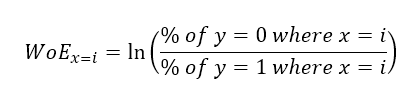

In [614]:
df1['WoE'] = np.log( df1.prop_n_good / df1.prop_n_bad )
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   
1     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
2     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
5     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
6     G    668   0.723054    0.007163    483.0   185.0     0.005804   

   prop_n_bad       WoE  
0    0.056562  1.127886  
1    0.206134  0.381823  
2    0.289086 -0.082784  
3    0.235411 -0.408059  
4    0.136228 -0.674117  
5    0.058156 -0.827742  
6    0.018423 -1.154990

In [615]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.723054    0.007163    483.0   185.0     0.005804   
1     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
2     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
5     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
6     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   

   prop_n_bad       WoE  
0    0.018423 -1.154990  
1    0.058156 -0.827742  
2    0.136228 -0.674117  
3    0.235411 -0.408059  
4    0.289086 -0.082784  
5    0.206134  0.381823  
6    0.056562  1.127886

In [616]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.723054    0.007163    483.0   185.0     0.005804   
1     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
2     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
5     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
6     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
0    0.018423 -1.154990             NaN       NaN  
1    0.058156 -0.827742        0.060570  0.327248  
2    0.136228 -0.674117        0.024914  0.153626  
3    0.235411 -0.408059        0.037856  0.266058  
4    0.289086 -0.082784        0.037709  0.325275  
5    0.206134  0.381823        0.039792  0.464607  
6    0.056562  1.127886        0.038510  0.746063

## Calculating the Information Value (IV) of a Discrete Variable

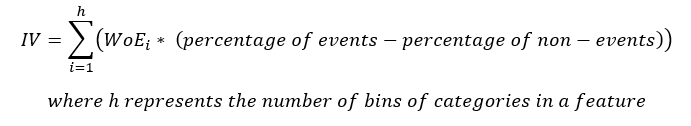

In [617]:
df1['IV'] = (df1.prop_n_good - df1.prop_n_bad) * df1.WoE
df1.IV = df1.IV.sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.723054    0.007163    483.0   185.0     0.005804   
1     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
2     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
5     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
6     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.018423 -1.154990             NaN       NaN  0.290669  
1    0.058156 -0.827742        0.060570  0.327248  0.290669  
2    0.136228 -0.674117        0.024914  0.153626  0.290669  
3    0.235411 -0.408059        0.037856  0.266058  0.290669  
4    0.289086 -0.082784        0.037709  0.325275  0.290669  
5    0.206134  0.381823        0.039792  0.464607  0.290669  
6    0.056562  1.127886        0.038510  0.746063  0.290669

Transforming the previous task into a function.

In [618]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [619]:
df_temp = woe_discrete(df_inputs, 'grade', df_targets)
df_temp

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.723054    0.007163    483.0   185.0     0.005804   
1     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
2     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
5     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
6     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.018423 -1.154990             NaN       NaN  0.290669  
1    0.058156 -0.827742        0.060570  0.327248  0.290669  
2    0.136228 -0.674117        0.024914  0.153626  0.290669  
3    0.235411 -0.408059        0.037856  0.266058  0.290669  
4    0.289086 -0.082784        0.037709  0.325275  0.290669  
5    0.206134  0.381823        0.039792  0.464607  0.290669  
6    0.056562  1.127886        0.038510  0.746063  0.290669

## Visualizing the Results

In [620]:
def plot_by_woe(df_WoE, rotation_of_x = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE.WoE
    plt.figure(figsize=(20,5))
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(f'Weight of Evidence by {str(df_WoE.columns[0])}')
    plt.xticks(rotation = rotation_of_x)


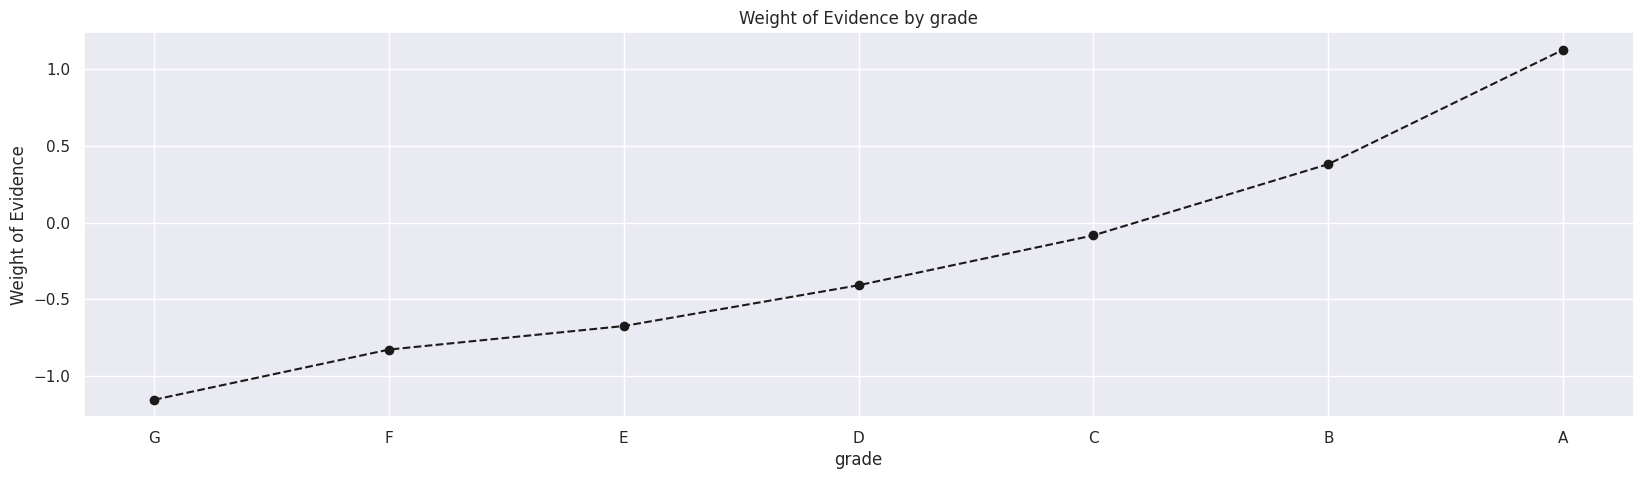

In [621]:
plot_by_woe(df_temp)

Transforming other variables and visualizing it

In [622]:
df_temp = woe_discrete(df_inputs, 'home_ownership' ,df_targets)
df_temp

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     45   0.844444    0.000483     38.0     7.0     0.000457   
1           RENT  37874   0.875719    0.406125  33167.0  4707.0     0.398570   
2            OWN   8409   0.889404    0.090170   7479.0   930.0     0.089876   
3           NONE     10   0.900000    0.000107      9.0     1.0     0.000108   
4       MORTGAGE  46919   0.906285    0.503115  42522.0  4397.0     0.510990   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.000697 -0.422975             NaN       NaN  0.022855  
1    0.468731 -0.162147        0.031275  0.260829  0.022855  
2    0.092611 -0.029982        0.013685  0.132165  0.022855  
3    0.000100  0.082573        0.010596  0.112555  0.022855  
4    0.437861  0.154448        0.006285  0.071875  0.022855

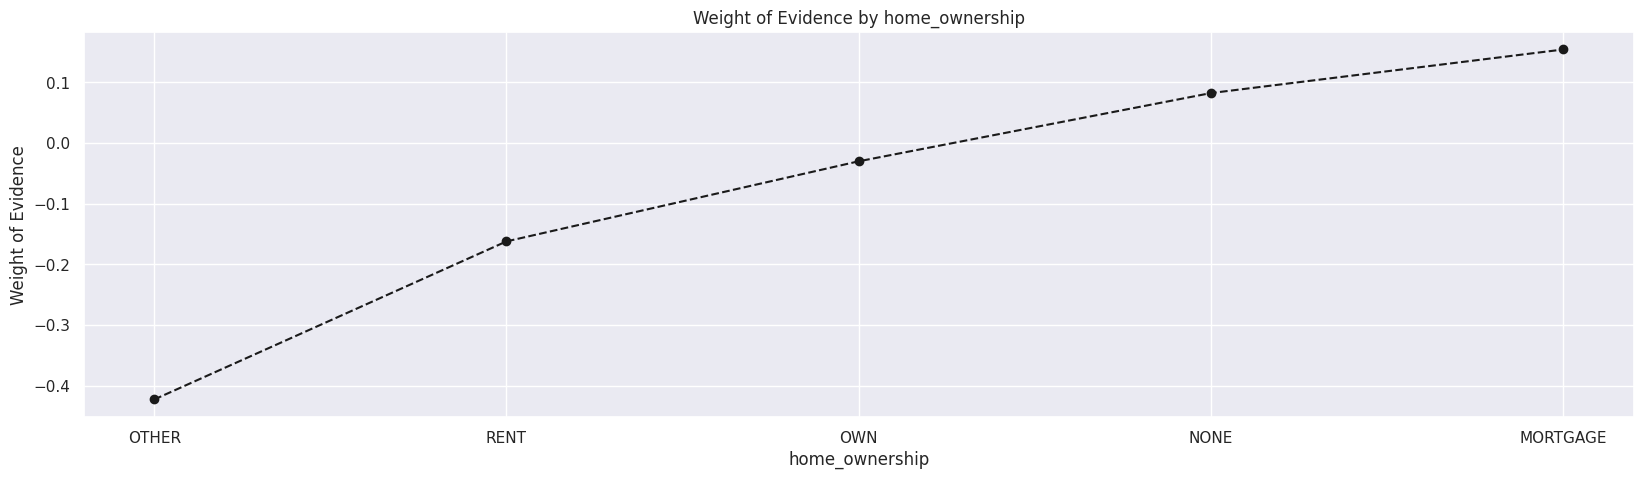

In [623]:
plot_by_woe(df_temp)

In [624]:
df_inputs['home_ownership:RENT_OTHER_NONE_ANY'] = sum( [df_inputs['home_ownership:RENT'],df_inputs['home_ownership:OTHER'], df_inputs['home_ownership:NONE'], df_inputs['home_ownership:ANY']] )

Adding the 4 categories together.

In [625]:
df_inputs['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [626]:
df_inputs['addr_state'].value_counts()

CA    14251
NY     8031
TX     7281
FL     6426
IL     3779
NJ     3676
PA     3334
OH     3102
GA     3015
VA     2856
NC     2478
MI     2358
MA     2214
MD     2203
WA     2145
AZ     2067
CO     1916
MN     1632
MO     1491
CT     1429
IN     1315
NV     1298
AL     1182
WI     1171
TN     1139
OR     1135
SC     1135
LA     1130
KY      851
OK      833
KS      830
AR      728
UT      672
NM      513
WV      486
HI      486
RI      403
NH      402
DC      297
MT      293
AK      248
MS      246
WY      209
DE      208
SD      179
VT      178
ID        2
ME        2
IA        1
NE        1
Name: addr_state, dtype: int64

No obsevations for the state ND.

In [627]:
if ['addr_state:ND'] in df_inputs.columns.values:
    pass
else:
    df_inputs['addr_state:ND'] = 0

In [628]:
df_temp = woe_discrete(df_inputs,'addr_state',df_targets)
df_temp

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE      1   0.000000    0.000011      0.0     1.0     0.000000   
1          ID      2   0.500000    0.000021      1.0     1.0     0.000012   
2          NV   1298   0.858243    0.013919   1114.0   184.0     0.013387   
3          HI    486   0.860082    0.005211    418.0    68.0     0.005023   
4          FL   6426   0.872549    0.068906   5607.0   819.0     0.067380   
5          AL   1182   0.875635    0.012675   1035.0   147.0     0.012438   
6          LA   1130   0.876991    0.012117    991.0   139.0     0.011909   
7          NJ   3676   0.878128    0.039418   3228.0   448.0     0.038791   
8          NY   8031   0.880837    0.086117   7074.0   957.0     0.085009   
9          RI    403   0.880893    0.004321    355.0    48.0     0.004266   
10         MI   2358   0.882103    0.025285   2080.0   278.0     0.024995   
11         NC   2478   0.882970    0.026572   2188.0   290.0     0.026293   
12         MD   2203   0.885157    0.023623   1950.0   253.0     0.023433   
13         OK    833   0.885954    0.008932    738.0    95.0     0.008869   
14         MO   1491   0.887324    0.015988   1323.0   168.0     0.015899   
15         AR    728   0.888736    0.007806    647.0    81.0     0.007775   
16         NM    513   0.888889    0.005501    456.0    57.0     0.005480   
17         AZ   2067   0.889211    0.022165   1838.0   229.0     0.022087   
18         PA   3334   0.890522    0.035751   2969.0   365.0     0.035679   
19         CA  14251   0.890674    0.152814  12693.0  1558.0     0.152533   
20         SD    179   0.893855    0.001919    160.0    19.0     0.001923   
21         DE    208   0.894231    0.002230    186.0    22.0     0.002235   
22         GA   3015   0.895522    0.032330   2700.0   315.0     0.032446   
23         NH    402   0.895522    0.004311    360.0    42.0     0.004326   
24         VA   2856   0.896359    0.030625   2560.0   296.0     0.030764   
25         IN   1315   0.896578    0.014101   1179.0   136.0     0.014168   
26         MA   2214   0.897019    0.023741   1986.0   228.0     0.023866   
27         OH   3102   0.897163    0.033263   2783.0   319.0     0.033443   
28         UT    672   0.898810    0.007206    604.0    68.0     0.007258   
29         WI   1171   0.899231    0.012557   1053.0   118.0     0.012654   
30         MN   1632   0.899510    0.017500   1468.0   164.0     0.017641   
31         WA   2145   0.901632    0.023001   1934.0   211.0     0.023241   
32         CO   1916   0.906054    0.020545   1736.0   180.0     0.020862   
33         TN   1139   0.906936    0.012214   1033.0   106.0     0.012414   
34         SC   1135   0.907489    0.012171   1030.0   105.0     0.012378   
35         OR   1135   0.908370    0.012171   1031.0   104.0     0.012390   
36         TX   7281   0.908392    0.078075   6614.0   667.0     0.079481   
37         IL   3779   0.911088    0.040522   3443.0   336.0     0.041375   
38         CT   1429   0.911127    0.015323   1302.0   127.0     0.015646   
39         KY    851   0.911868    0.009125    776.0    75.0     0.009325   
40         WV    486   0.917695    0.005211    446.0    40.0     0.005360   
41         WY    209   0.918660    0.002241    192.0    17.0     0.002307   
42         AK    248   0.919355    0.002659    228.0    20.0     0.002740   
43         VT    178   0.921348    0.001909    164.0    14.0     0.001971   
44         DC    297   0.922559    0.003185    274.0    23.0     0.003293   
45         MS    246   0.922764    0.002638    227.0    19.0     0.002728   
46         KS    830   0.922892    0.008900    766.0    64.0     0.009205   
47         MT    293   0.928328    0.003142    272.0    21.0     0.003269   
48         ME      2   1.000000    0.000021      2.0     0.0     0.000024   
49         IA      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000100   

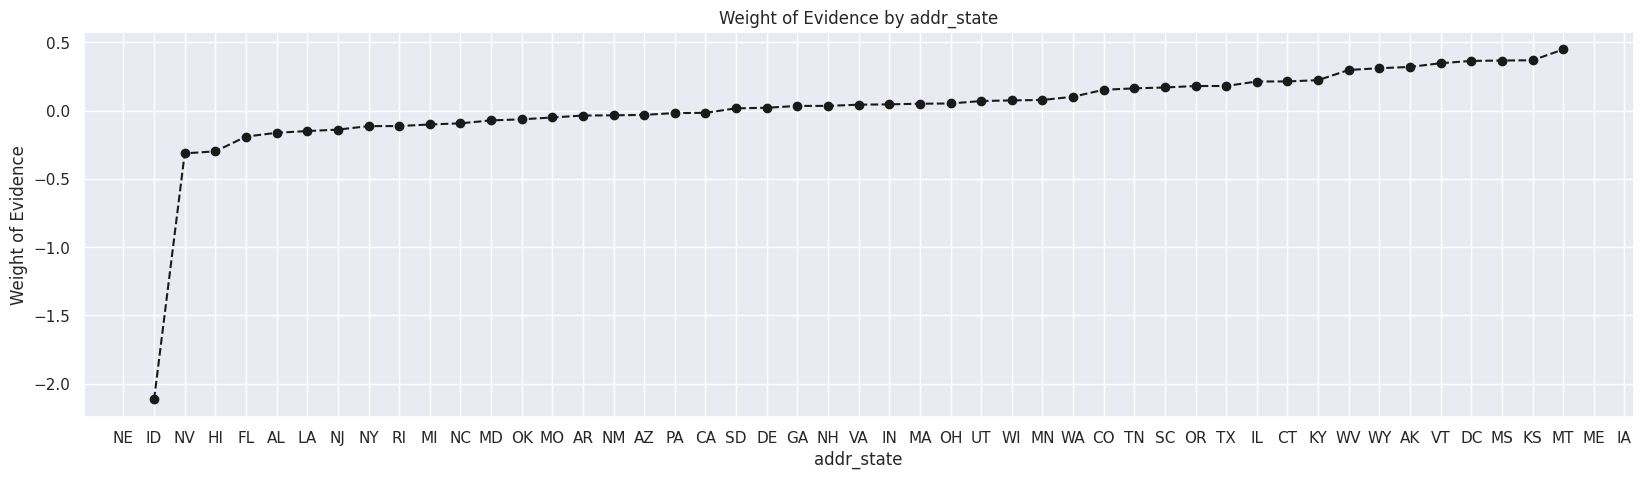

In [629]:
plot_by_woe(df_temp)

Taking the first two and the last one out of the graphic because they have a few observations. Grouping in other variables, besides IA has a better WoE, I am grouping with the lowest ones, beacause they are high risk variable as we don't have enough observations to predict.

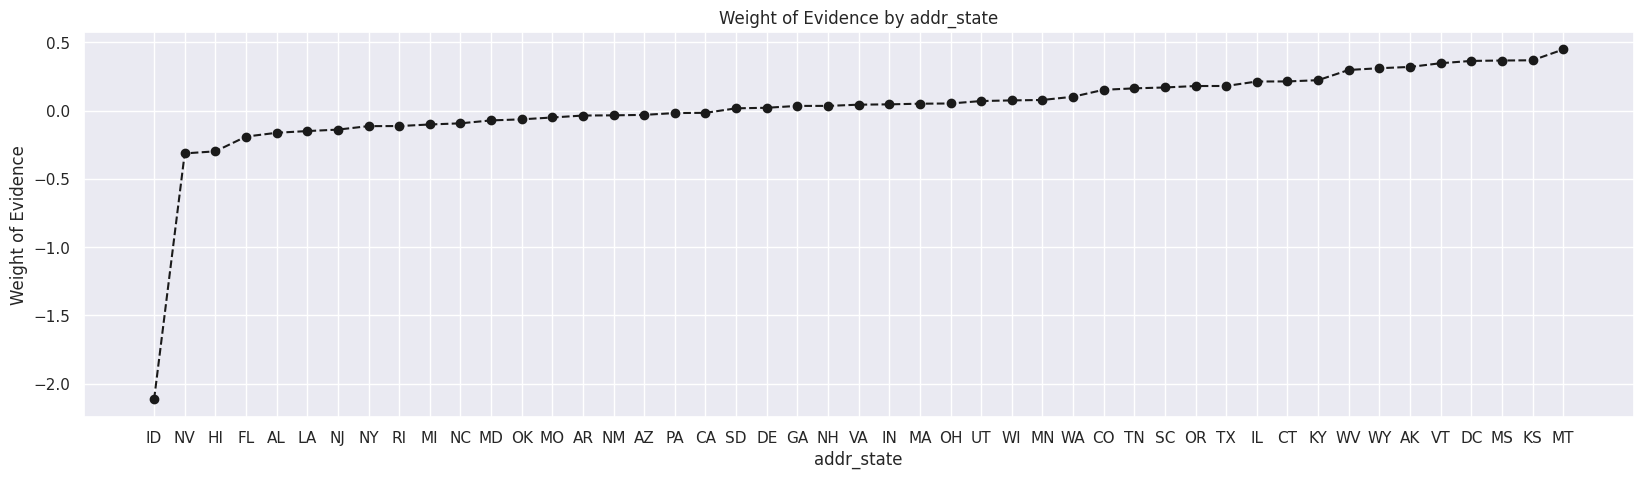

In [630]:
plot_by_woe(df_temp.iloc[1:-2,:])

In [631]:
df_inputs['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs['addr_state:ND'], df_inputs['addr_state:NE'],
                                                         df_inputs['addr_state:IA'], df_inputs['addr_state:NV'],
                                                         df_inputs['addr_state:FL'], df_inputs['addr_state:HI'],
                                                         df_inputs['addr_state:AL']])


df_inputs['addr_state:NM_VA'] = sum([df_inputs['addr_state:NM'], df_inputs['addr_state:VA']])


df_inputs['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs['addr_state:OK'], df_inputs['addr_state:TN'],
                                              df_inputs['addr_state:MO'], df_inputs['addr_state:LA'],
                                              df_inputs['addr_state:MD'], df_inputs['addr_state:NC']])

# No including CA, they have already a particular number of observations, I did the same with NY and TX


df_inputs['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs['addr_state:UT'], df_inputs['addr_state:KY'],
                                              df_inputs['addr_state:AZ'], df_inputs['addr_state:NJ']])


df_inputs['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs['addr_state:AR'], df_inputs['addr_state:MI'],
                                              df_inputs['addr_state:PA'], df_inputs['addr_state:OH'],
                                              df_inputs['addr_state:MN']])


df_inputs['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs['addr_state:RI'], df_inputs['addr_state:MA'],
                                              df_inputs['addr_state:DE'], df_inputs['addr_state:SD'],
                                              df_inputs['addr_state:IN']])


df_inputs['addr_state:GA_WA_OR'] = sum([df_inputs['addr_state:GA'], df_inputs['addr_state:WA'],
                                              df_inputs['addr_state:OR']])



df_inputs['addr_state:WI_MT'] = sum([df_inputs['addr_state:WI'], df_inputs['addr_state:MT']])



df_inputs['addr_state:IL_CT'] = sum([df_inputs['addr_state:IL'], df_inputs['addr_state:CT']])



df_inputs['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs['addr_state:KS'], df_inputs['addr_state:SC'],
                                              df_inputs['addr_state:CO'], df_inputs['addr_state:VT'],
                                              df_inputs['addr_state:AK'], df_inputs['addr_state:MS']])


df_inputs['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs['addr_state:WV'], df_inputs['addr_state:NH'],
                                              df_inputs['addr_state:WY'], df_inputs['addr_state:DC'],
                                              df_inputs['addr_state:ME'], df_inputs['addr_state:ID']])

In [632]:
df_inputs['verification_status'].value_counts()

Verified           33641
Source Verified    29963
Not Verified       29653
Name: verification_status, dtype: int64

In [633]:
df_temp = woe_discrete(df_inputs,'verification_status', df_targets)
df_temp

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  33641   0.873369    0.360734  29381.0  4260.0   
1     Source Verified  29963   0.896205    0.321295  26853.0  3110.0   
2        Not Verified  29653   0.909891    0.317971  26981.0  2672.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353073    0.424218 -0.183572             NaN       NaN  0.025088  
1     0.322694    0.309699  0.041103        0.022837  0.224676  0.025088  
2     0.324232    0.266082  0.197654        0.013686  0.156551  0.025088

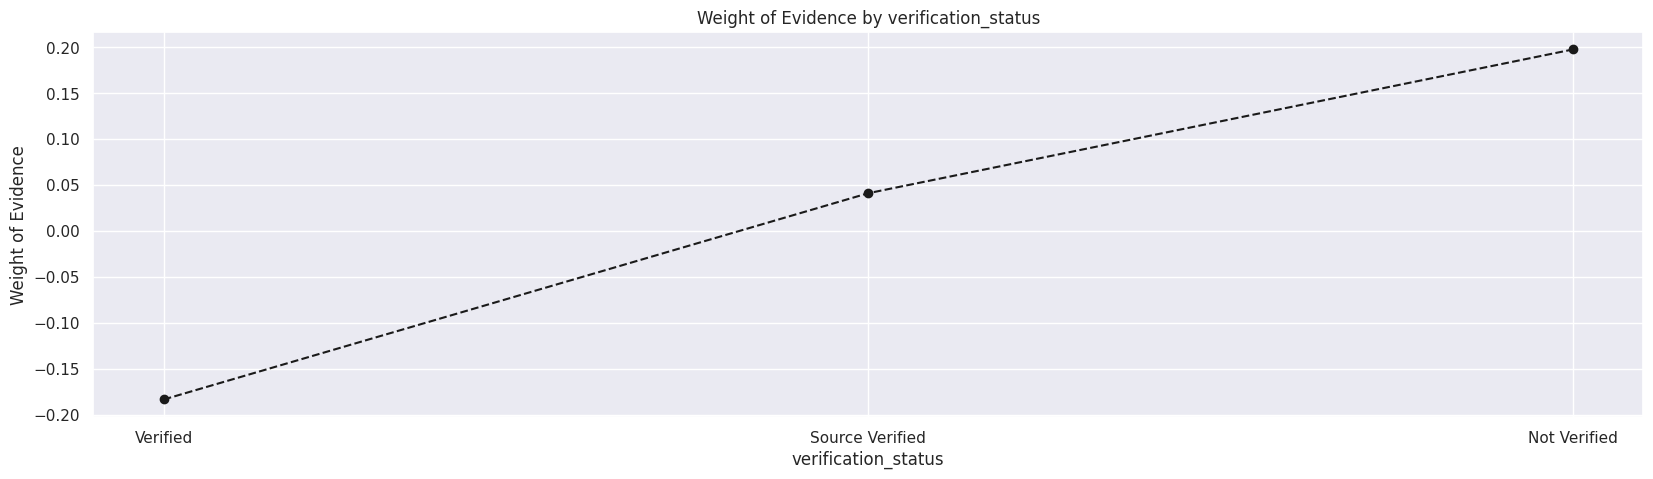

In [634]:
plot_by_woe(df_temp)

In [635]:
df_inputs['purpose'].value_counts()

debt_consolidation    55012
credit_card           20576
home_improvement       5299
other                  4806
major_purchase         1991
small_business         1431
car                    1072
medical                 918
moving                  602
vacation                496
wedding                 456
house                   439
educational              89
renewable_energy         70
Name: purpose, dtype: int64

In [636]:
df_temp = woe_discrete(df_inputs, 'purpose', df_targets)
df_temp

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     renewable_energy     70   0.771429    0.000751     54.0    16.0   
1       small_business   1431   0.788959    0.015345   1129.0   302.0   
2          educational     89   0.842697    0.000954     75.0    14.0   
3                house    439   0.861048    0.004707    378.0    61.0   
4              medical    918   0.863834    0.009844    793.0   125.0   
5                other   4806   0.866209    0.051535   4163.0   643.0   
6              wedding    456   0.868421    0.004890    396.0    60.0   
7               moving    602   0.878738    0.006455    529.0    73.0   
8             vacation    496   0.883065    0.005319    438.0    58.0   
9   debt_consolidation  55012   0.886879    0.589897  48789.0  6223.0   
10      major_purchase   1991   0.901557    0.021350   1795.0   196.0   
11    home_improvement   5299   0.910172    0.056821   4823.0   476.0   
12                 car   1072   0.916978    0.011495    983.0    89.0   
13         credit_card  20576   0.917088    0.220638  18870.0  1706.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0      0.000649    0.001593 -0.898256             NaN       NaN  0.04078  
1      0.013567    0.030074 -0.795991        0.017530  0.102265  0.04078  
2      0.000901    0.001394 -0.436221        0.053738  0.359770  0.04078  
3      0.004542    0.006074 -0.290631        0.018351  0.145590  0.04078  
4      0.009530    0.012448 -0.267142        0.002787  0.023489  0.04078  
5      0.050027    0.064031 -0.246805        0.002374  0.020337  0.04078  
6      0.004759    0.005975 -0.227582        0.002212  0.019223  0.04078  
7      0.006357    0.007269 -0.134122        0.010316  0.093459  0.04078  
8      0.005263    0.005776 -0.092875        0.004327  0.041247  0.04078  
9      0.586301    0.619697 -0.055399        0.003815  0.037477  0.04078  
10     0.021571    0.019518  0.099994        0.014678  0.155393  0.04078  
11     0.057958    0.047401  0.201082        0.008615  0.101088  0.04078  
12     0.011813    0.008863  0.287321        0.006806  0.086239  0.04078  
13     0.226762    0.169886  0.288771        0.000110  0.001449  0.04078

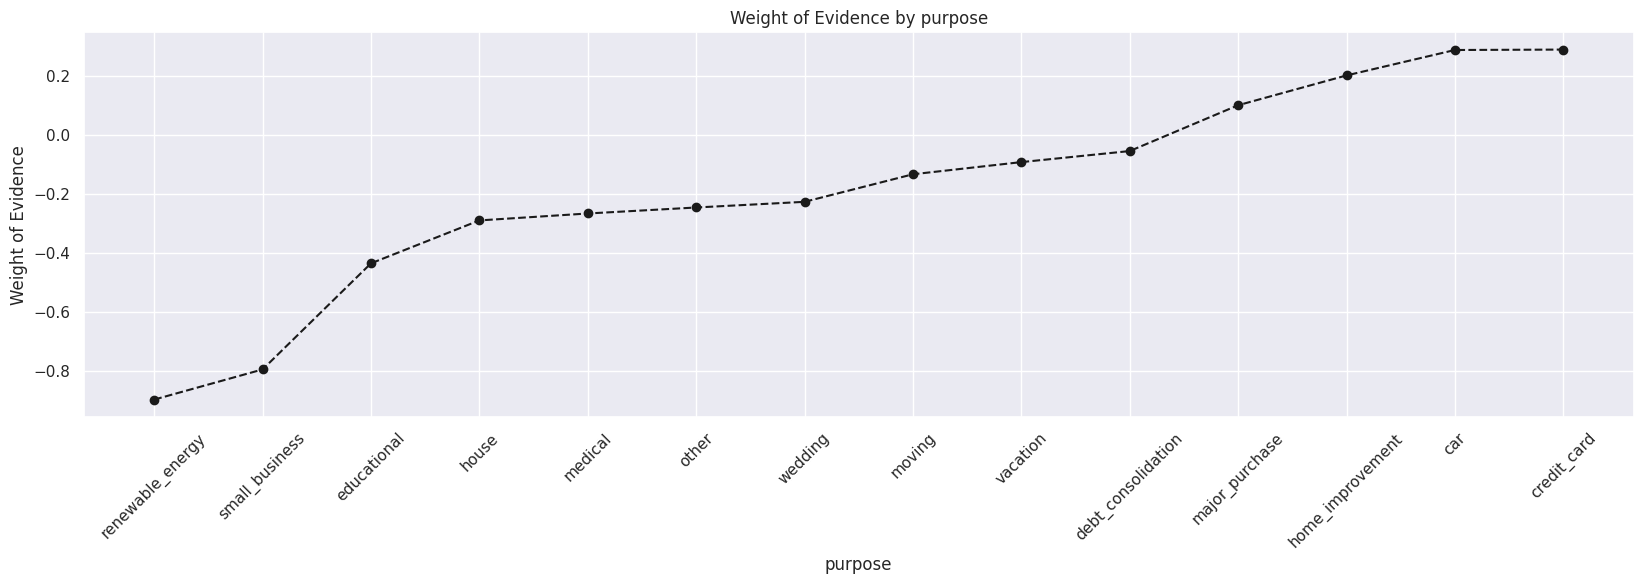

In [637]:
plot_by_woe(df_temp, 45)

In [638]:
df_inputs['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs['purpose:educational'], df_inputs['purpose:small_business'],
                                                                 df_inputs['purpose:wedding'], df_inputs['purpose:renewable_energy'],
                                                                 df_inputs['purpose:moving'], df_inputs['purpose:house']])
df_inputs['purpose:oth__med__vacation'] = sum([df_inputs['purpose:other'], df_inputs['purpose:medical'],
                                             df_inputs['purpose:vacation']])
df_inputs['purpose:major_purch__car__home_impr'] = sum([df_inputs['purpose:major_purchase'], df_inputs['purpose:car'],
                                                        df_inputs['purpose:home_improvement']])

In [639]:
df_inputs['initial_list_status'].value_counts()

f    60491
w    32766
Name: initial_list_status, dtype: int64

In [640]:
df_temp = woe_discrete(df_inputs , 'initial_list_status', df_targets)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  60491   0.882131    0.648648  53361.0  7130.0   
1                   w  32766   0.911127    0.351352  29854.0  2912.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.641243    0.710018 -0.101882             NaN       NaN  0.021644  
1     0.358757    0.289982  0.212827        0.028996   0.31471  0.021644

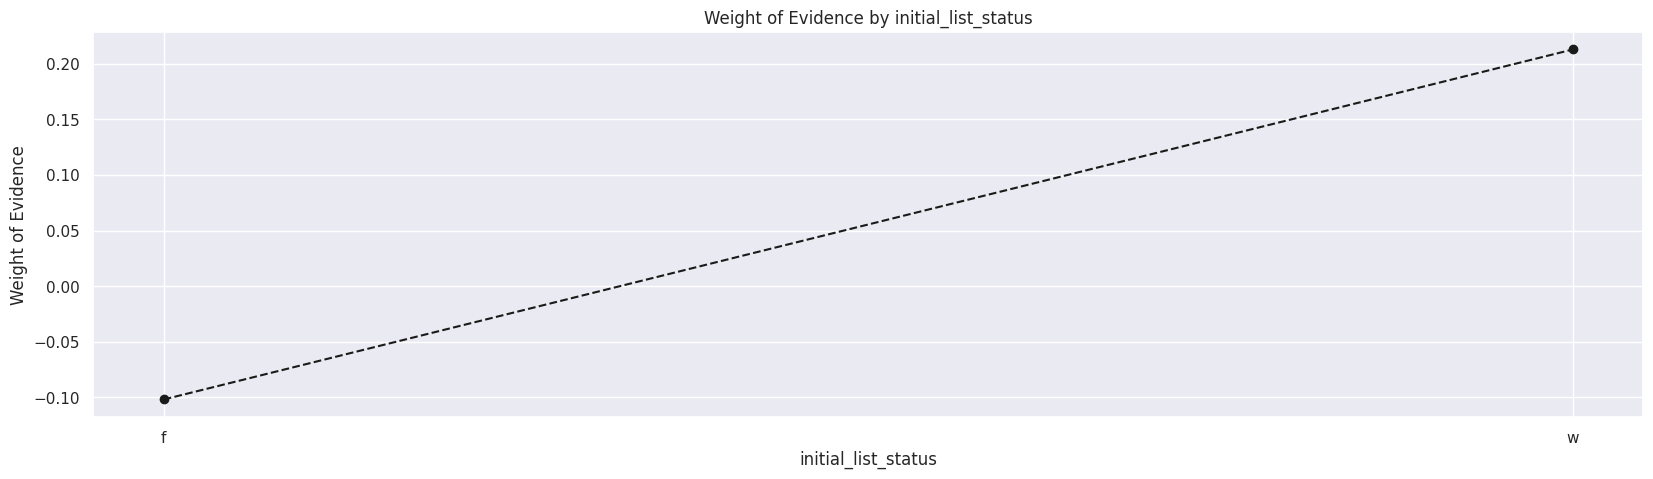

In [641]:
plot_by_woe(df_temp)

## Calculating the Weight of Evidence and Information Value for the continuous Variables

In [642]:
def woe_continuous(df, continuous_variable_name, good_bad_variable_df):
    df = pd.concat([df[continuous_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [643]:
df_inputs['term_int'].unique()

array([60, 36])

In [644]:
df_temp = woe_continuous(df_inputs, 'term_int', df_targets)
df_temp

term_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        36  67534   0.904522    0.724171  61086.0  6448.0     0.734074   
1        60  25723   0.860281    0.275829  22129.0  3594.0     0.265926   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.642103  0.133861             NaN       NaN  0.039629  
1    0.357897 -0.297028        0.044241   0.43089  0.039629

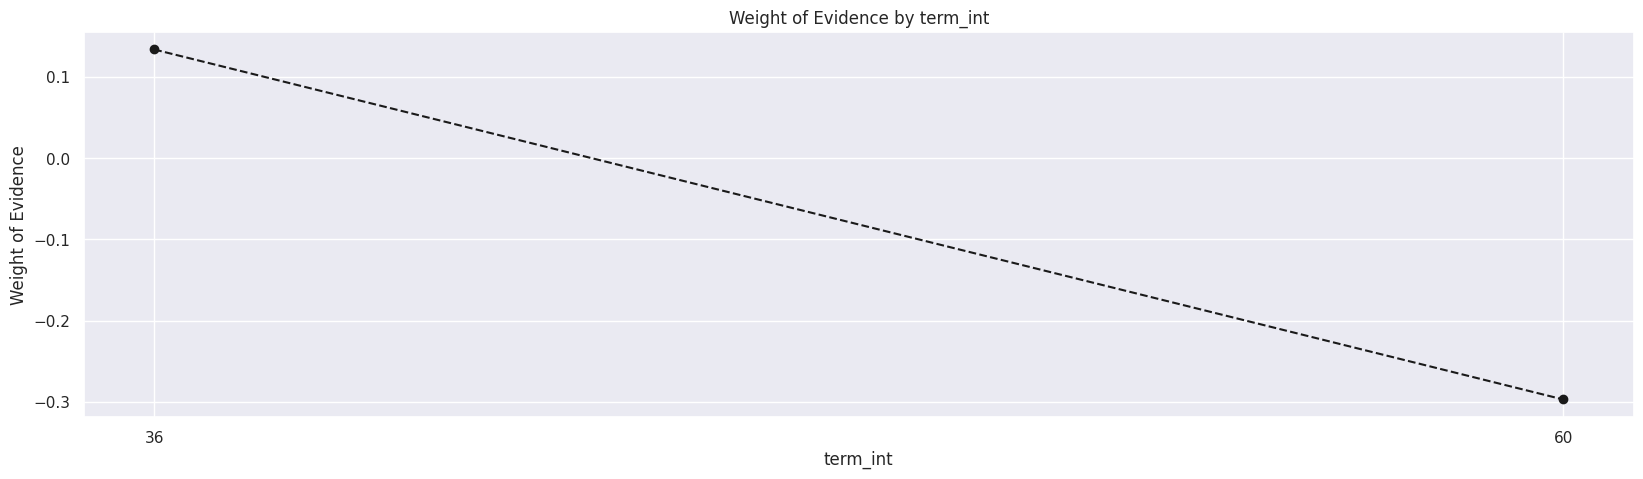

In [645]:
plot_by_woe(df_temp)

In [646]:
df_inputs['term:36'] = np.where( ( df_inputs['term_int']==36 ) , 1, 0)
df_inputs['term:60'] = np.where( ( df_inputs['term_int']==60 ) , 1, 0)

In [647]:
df_inputs['emp_length_int'].unique()

array([ 0, 10,  1,  2,  9,  3,  6,  4,  7,  8,  5])

In [648]:
df_temp = woe_continuous(df_inputs, 'emp_length_int', df_targets)
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                0  11553   0.876223    0.123883  10123.0  1430.0   
1                1   5968   0.896113    0.063995   5348.0   620.0   
2                2   8295   0.888849    0.088948   7373.0   922.0   
3                3   7391   0.891084    0.079254   6586.0   805.0   
4                4   5555   0.891449    0.059567   4952.0   603.0   
5                5   6172   0.888205    0.066183   5482.0   690.0   
6                6   5225   0.881148    0.056028   4604.0   621.0   
7                7   5131   0.894562    0.055020   4590.0   541.0   
8                8   4542   0.891458    0.048704   4049.0   493.0   
9                9   3621   0.894504    0.038828   3239.0   382.0   
10              10  29804   0.901523    0.319590  26869.0  2935.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.121649    0.142402 -0.157516             NaN       NaN  0.007451  
1      0.064267    0.061741  0.040107        0.019890  0.197623  0.007451  
2      0.088602    0.091814 -0.035617        0.007264  0.075724  0.007451  
3      0.079144    0.080163 -0.012792        0.002235  0.022824  0.007451  
4      0.059509    0.060048 -0.009022        0.000365  0.003770  0.007451  
5      0.065878    0.068711 -0.042118        0.003244  0.033096  0.007451  
6      0.055327    0.061840 -0.111302        0.007056  0.069184  0.007451  
7      0.055158    0.053874  0.023565        0.013414  0.134866  0.007451  
8      0.048657    0.049094 -0.008935        0.003105  0.032500  0.007451  
9      0.038923    0.038040  0.022948        0.003047  0.031883  0.007451  
10     0.322886    0.292272  0.099614        0.007019  0.076666  0.007451

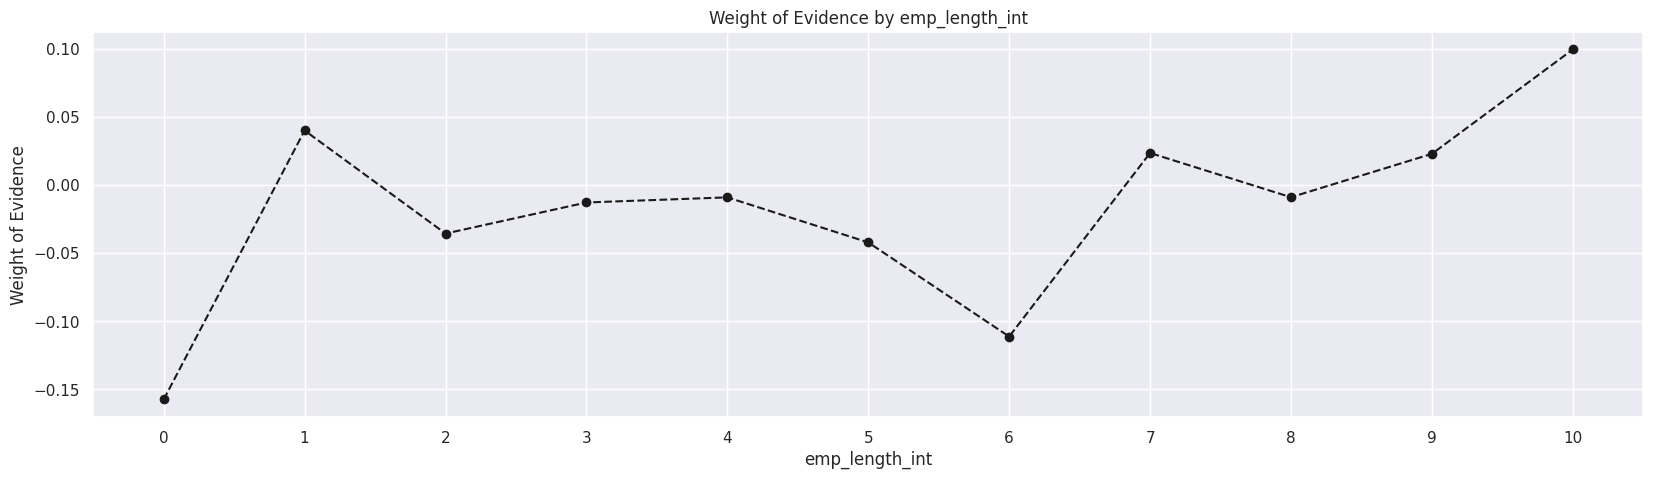

In [649]:
plot_by_woe(df_temp)

In [650]:
df_inputs['emp_length:0'] = np.where( df_inputs['emp_length_int']==0 , 1 ,0 )
df_inputs['emp_length:1'] = np.where( df_inputs['emp_length_int']==1 , 1 ,0 )
df_inputs['emp_length:2,3,4'] = np.where( df_inputs['emp_length_int'].isin([2,3,4]) , 1 ,0 )
df_inputs['emp_length:5,6'] = np.where( df_inputs['emp_length_int'].isin([5,6]) , 1 ,0 )
df_inputs['emp_length:7,8,9'] = np.where( df_inputs['emp_length_int'].isin([7,8,9]) , 1 ,0 )
df_inputs['emp_length:10'] = np.where( df_inputs['emp_length_int']==10 , 1 ,0 )

In [651]:
df_inputs['mths_issue_date'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [652]:
df_inputs['mths_since_issue_d_factor'] = pd.cut(df_inputs['mths_issue_date'], 50)
df_temp = woe_continuous(df_inputs , 'mths_since_issue_d_factor', df_targets)
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0              (35.91, 37.8]   7191   0.945766    0.077109  6801.0  390.0   
1               (37.8, 39.6]   9752   0.930373    0.104571  9073.0  679.0   
2               (39.6, 41.4]   9506   0.919945    0.101933  8745.0  761.0   
3               (41.4, 43.2]   7240   0.909116    0.077635  6582.0  658.0   
4               (43.2, 45.0]   7217   0.902868    0.077388  6516.0  701.0   
5               (45.0, 46.8]   3104   0.895296    0.033284  2779.0  325.0   
6               (46.8, 48.6]   6197   0.890269    0.066451  5517.0  680.0   
7               (48.6, 50.4]   5821   0.885930    0.062419  5157.0  664.0   
8               (50.4, 52.2]   5021   0.878909    0.053840  4413.0  608.0   
9               (52.2, 54.0]   4497   0.874138    0.048222  3931.0  566.0   
10              (54.0, 55.8]   2064   0.866279    0.022132  1788.0  276.0   
11              (55.8, 57.6]   3572   0.861422    0.038303  3077.0  495.0   
12              (57.6, 59.4]   2904   0.850895    0.031140  2471.0  433.0   
13              (59.4, 61.2]   2474   0.847615    0.026529  2097.0  377.0   
14              (61.2, 63.0]   2539   0.851910    0.027226  2163.0  376.0   
15              (63.0, 64.8]   1115   0.837668    0.011956   934.0  181.0   
16              (64.8, 66.6]   1721   0.816967    0.018454  1406.0  315.0   
17              (66.6, 68.4]   1296   0.852623    0.013897  1105.0  191.0   
18              (68.4, 70.2]   1097   0.839562    0.011763   921.0  176.0   
19              (70.2, 72.0]   1001   0.816184    0.010734   817.0  184.0   
20              (72.0, 73.8]    447   0.829978    0.004793   371.0   76.0   
21              (73.8, 75.6]    790   0.853165    0.008471   674.0  116.0   
22              (75.6, 77.4]    754   0.867374    0.008085   654.0  100.0   
23              (77.4, 79.2]    690   0.844928    0.007399   583.0  107.0   
24              (79.2, 81.0]    599   0.876461    0.006423   525.0   74.0   
25              (81.0, 82.8]    254   0.870079    0.002724   221.0   33.0   
26              (82.8, 84.6]    533   0.885553    0.005715   472.0   61.0   
27              (84.6, 86.4]    459   0.862745    0.004922   396.0   63.0   
28              (86.4, 88.2]    443   0.891648    0.004750   395.0   48.0   
29              (88.2, 90.0]    439   0.881549    0.004707   387.0   52.0   
30              (90.0, 91.8]    194   0.855670    0.002080   166.0   28.0   
31              (91.8, 93.6]    367   0.923706    0.003935   339.0   28.0   
32              (93.6, 95.4]    257   0.887160    0.002756   228.0   29.0   
33              (95.4, 97.2]    276   0.862319    0.002960   238.0   38.0   
34              (97.2, 99.0]    234   0.846154    0.002509   198.0   36.0   
35             (99.0, 100.8]    100   0.950000    0.001072    95.0    5.0   
36            (100.8, 102.6]    170   0.900000    0.001823   153.0   17.0   
37            (102.6, 104.4]    150   0.893333    0.001608   134.0   16.0   
38            (104.4, 106.2]    129   0.899225    0.001383   116.0   13.0   
39            (106.2, 108.0]    119   0.890756    0.001276   106.0   13.0   
40            (108.0, 109.8]     36   0.861111    0.000386    31.0    5.0   
41            (109.8, 111.6]     40   0.900000    0.000429    36.0    4.0   
42            (111.6, 113.4]     37   1.000000    0.000397    37.0    0.0   
43            (113.4, 115.2]     57   0.894737    0.000611    51.0    6.0   
44            (115.2, 117.0]    131   0.885496    0.001405   116.0   15.0   
45            (117.0, 118.8]     59   0.915254    0.000633    54.0    5.0   
46            (118.8, 120.6]     83   0.867470    0.000890    72.0   11.0   
47            (120.6, 122.4]     41   0.902439    0.000440    37.0    4.0   
48            (122.4, 124.2]     23   0.869565    0.000247    20.0    3.0   
49            (124.2, 126.0]     17   1.000000    0.000182    17.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   

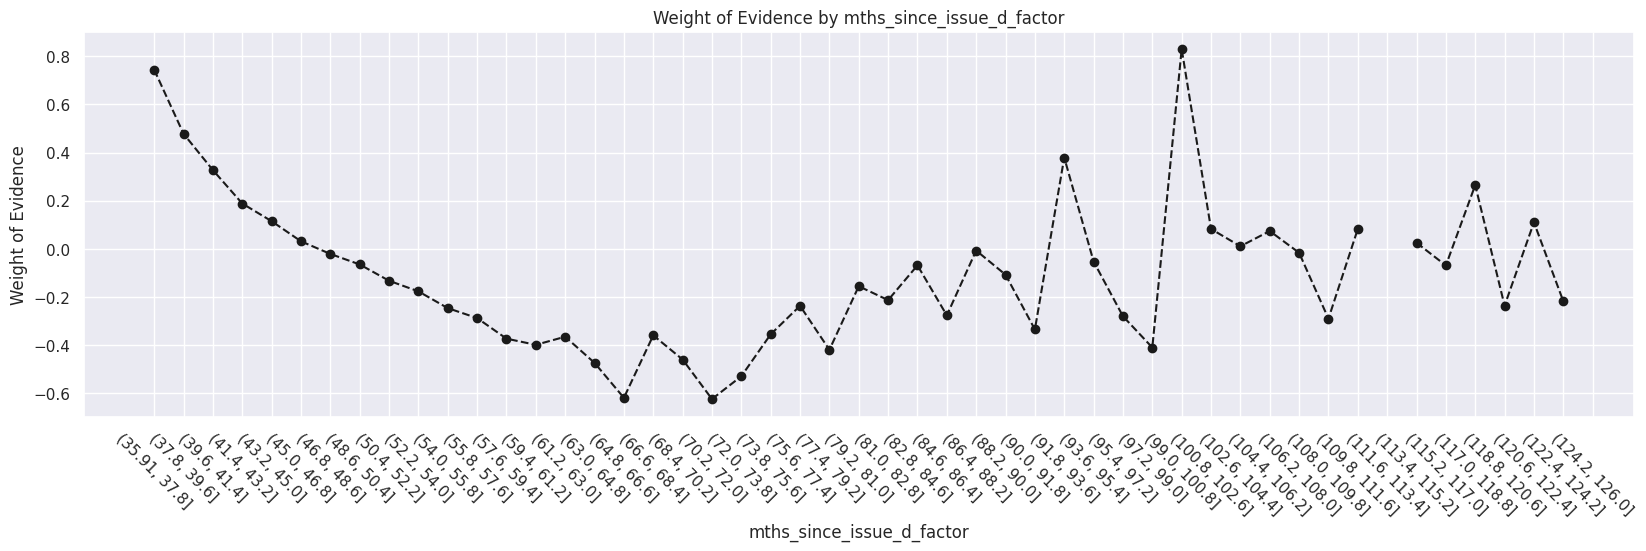

In [653]:
plot_by_woe(df_temp,-45)

In [654]:
df_inputs['mths_since_issue_d:<38'] = np.where(df_inputs['mths_issue_date'].isin(range(38)), 1, 0)

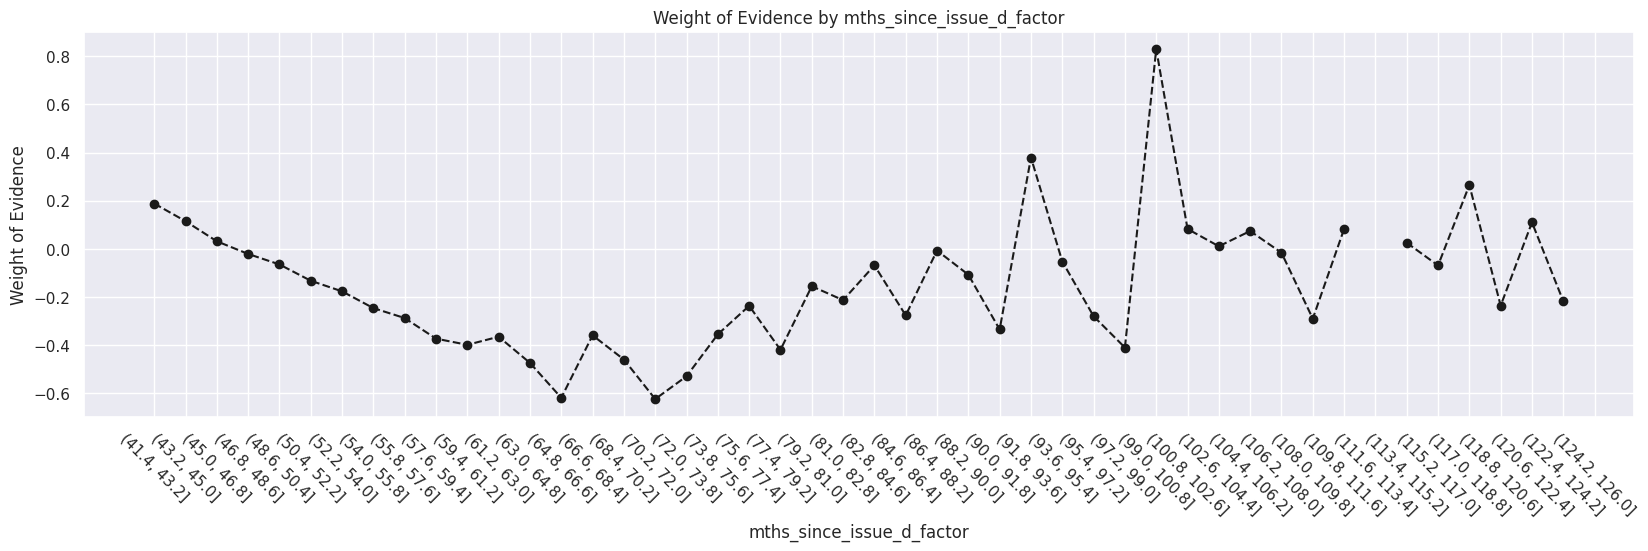

In [655]:
plot_by_woe(df_temp.iloc[3: , :],-45)

In [656]:
df_inputs['mths_since_issue_d:38-39'] = np.where(df_inputs['mths_issue_date'].isin(range(38, 40)), 1, 0)
df_inputs['mths_since_issue_d:40-41'] = np.where(df_inputs['mths_issue_date'].isin(range(40, 42)), 1, 0)
df_inputs['mths_since_issue_d:42-48'] = np.where(df_inputs['mths_issue_date'].isin(range(42, 49)), 1, 0)
df_inputs['mths_since_issue_d:49-52'] = np.where(df_inputs['mths_issue_date'].isin(range(49, 53)), 1, 0)
df_inputs['mths_since_issue_d:53-64'] = np.where(df_inputs['mths_issue_date'].isin(range(53, 65)), 1, 0)
df_inputs['mths_since_issue_d:65-84'] = np.where(df_inputs['mths_issue_date'].isin(range(65, 85)), 1, 0)
df_inputs['mths_since_issue_d:>84'] = np.where(df_inputs['mths_issue_date'].isin(range(85, int(df_inputs['mths_issue_date'].max()))), 1, 0)

In [657]:
df_inputs['int_rate_factor'] = pd.cut( df_inputs['int_rate'] , 50 )
df_temp = woe_continuous(df_inputs, 'int_rate_factor', df_targets)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    198   0.969697    0.002123   192.0    6.0   
1     (5.833, 6.246]   2086   0.979866    0.022368  2044.0   42.0   
2     (6.246, 6.658]   1974   0.972138    0.021167  1919.0   55.0   
3     (6.658, 7.071]    477   0.951782    0.005115   454.0   23.0   
4     (7.071, 7.484]    804   0.982587    0.008621   790.0   14.0   
5     (7.484, 7.897]   3245   0.965485    0.034796  3133.0  112.0   
6      (7.897, 8.31]   2429   0.951009    0.026046  2310.0  119.0   
7      (8.31, 8.722]   1680   0.966071    0.018015  1623.0   57.0   
8     (8.722, 9.135]   2384   0.942534    0.025564  2247.0  137.0   
9     (9.135, 9.548]   1590   0.976730    0.017050  1553.0   37.0   
10    (9.548, 9.961]   1881   0.934078    0.020170  1757.0  124.0   
11   (9.961, 10.374]   2766   0.936732    0.029660  2591.0  175.0   
12  (10.374, 10.786]   1390   0.922302    0.014905  1282.0  108.0   
13  (10.786, 11.199]   4464   0.938172    0.047868  4188.0  276.0   
14  (11.199, 11.612]   1213   0.922506    0.013007  1119.0   94.0   
15  (11.612, 12.025]   3737   0.932834    0.040072  3486.0  251.0   
16  (12.025, 12.438]   3077   0.906402    0.032995  2789.0  288.0   
17   (12.438, 12.85]   2754   0.923747    0.029531  2544.0  210.0   
18   (12.85, 13.263]   5440   0.905699    0.058333  4927.0  513.0   
19  (13.263, 13.676]   3806   0.899107    0.040812  3422.0  384.0   
20  (13.676, 14.089]   2692   0.896731    0.028866  2414.0  278.0   
21  (14.089, 14.502]   5760   0.889062    0.061765  5121.0  639.0   
22  (14.502, 14.914]   1187   0.874473    0.012728  1038.0  149.0   
23  (14.914, 15.327]   4811   0.883808    0.051589  4252.0  559.0   
24   (15.327, 15.74]   3146   0.890337    0.033735  2801.0  345.0   
25   (15.74, 16.153]   1869   0.842162    0.020041  1574.0  295.0   
26  (16.153, 16.566]   3230   0.850464    0.034635  2747.0  483.0   
27  (16.566, 16.978]   1035   0.855072    0.011098   885.0  150.0   
28  (16.978, 17.391]   2843   0.850510    0.030486  2418.0  425.0   
29  (17.391, 17.804]   2992   0.839572    0.032083  2512.0  480.0   
30  (17.804, 18.217]    286   0.846154    0.003067   242.0   44.0   
31   (18.217, 18.63]   2729   0.828509    0.029263  2261.0  468.0   
32   (18.63, 19.042]   1835   0.821253    0.019677  1507.0  328.0   
33  (19.042, 19.455]   1135   0.789427    0.012171   896.0  239.0   
34  (19.455, 19.868]   1680   0.817857    0.018015  1374.0  306.0   
35  (19.868, 20.281]   1244   0.850482    0.013339  1058.0  186.0   
36  (20.281, 20.694]    805   0.816149    0.008632   657.0  148.0   
37  (20.694, 21.106]    956   0.793933    0.010251   759.0  197.0   
38  (21.106, 21.519]    701   0.760342    0.007517   533.0  168.0   
39  (21.519, 21.932]    222   0.806306    0.002381   179.0   43.0   
40  (21.932, 22.345]    832   0.775240    0.008922   645.0  187.0   
41  (22.345, 22.758]    586   0.737201    0.006284   432.0  154.0   
42   (22.758, 23.17]    375   0.741333    0.004021   278.0   97.0   
43   (23.17, 23.583]    655   0.778626    0.007024   510.0  145.0   
44  (23.583, 23.996]    408   0.750000    0.004375   306.0  102.0   
45  (23.996, 24.409]    393   0.834606    0.004214   328.0   65.0   
46  (24.409, 24.822]    436   0.786697    0.004675   343.0   93.0   
47  (24.822, 25.234]    351   0.792023    0.003764   278.0   73.0   
48  (25.234, 25.647]    194   0.757732    0.002080   147.0   47.0   
49   (25.647, 26.06]    474   0.738397    0.005083   350.0  124.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002307    0.000597  1.351085             NaN       NaN  0.373629  
1      0.024563    0.004182  1.770343        0.010169  0.419258  0.373629  
2      0.023061    0.005477  1.437575        0.007728  0.332768  0.373629  
3      0.005456    0.002290  0.867952        0.020356  0.569623  0.373629  
4      0.009493    0.001394  1.918324        0.030805  1.050373  0.373629  
5      0.037649    0.011153  

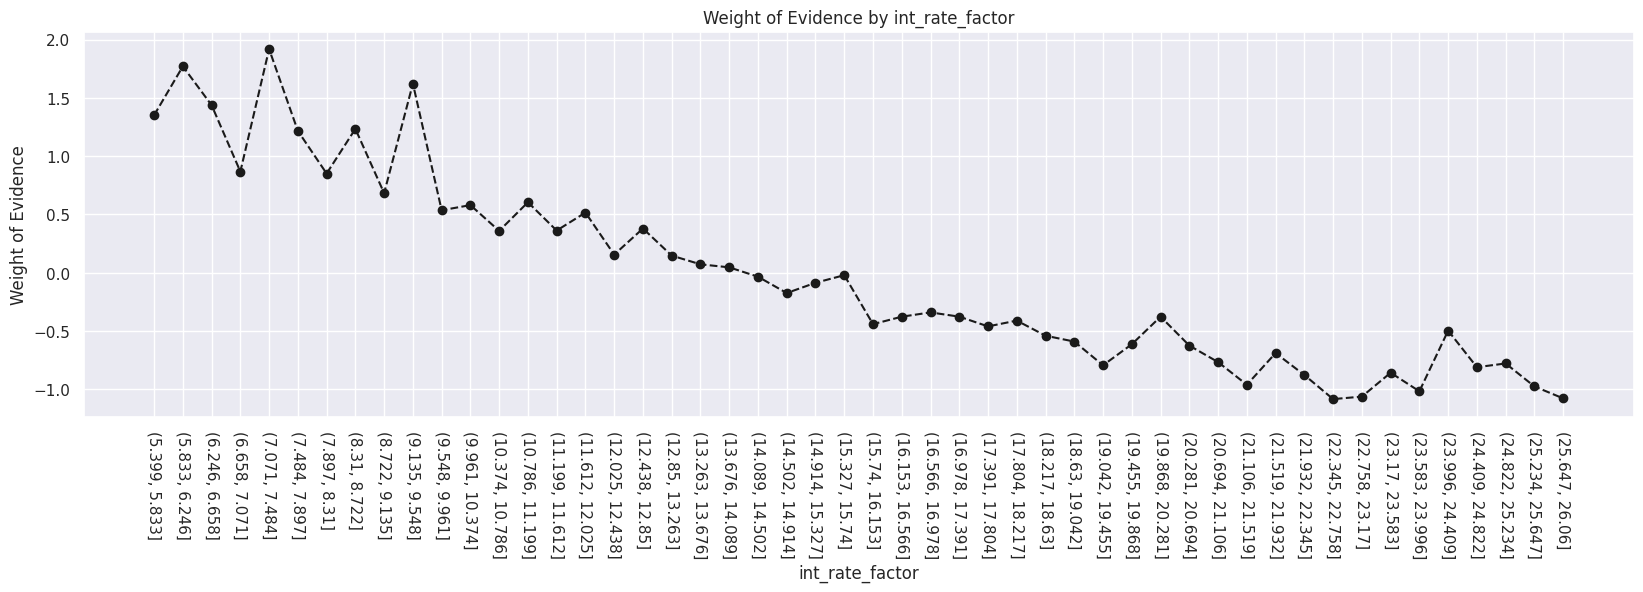

In [658]:
plot_by_woe(df_temp, -90)

In [659]:
df_inputs['int_rate:<9.548'] = np.where((df_inputs['int_rate'] <= 9.548), 1, 0)
df_inputs['int_rate:9.548-12.025'] = np.where((df_inputs['int_rate'] > 9.548) & (df_inputs['int_rate'] <= 12.025), 1, 0)
df_inputs['int_rate:12.025-15.74'] = np.where((df_inputs['int_rate'] > 12.025) & (df_inputs['int_rate'] <= 15.74), 1, 0)
df_inputs['int_rate:15.74-20.281'] = np.where((df_inputs['int_rate'] > 15.74) & (df_inputs['int_rate'] <= 20.281), 1, 0)
df_inputs['int_rate:>20.281'] = np.where((df_inputs['int_rate'] > 20.281), 1, 0)

In [660]:
df_inputs['funded_amnt_factor'] = pd.cut(df_inputs['funded_amnt'], 50)
df_temp = woe_continuous(df_inputs, 'funded_amnt_factor', df_targets)
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319   0.890282    0.003421   284.0   35.0   
1     (1190.0, 1880.0]    800   0.897500    0.008578   718.0   82.0   
2     (1880.0, 2570.0]   1513   0.904164    0.016224  1368.0  145.0   
3     (2570.0, 3260.0]   1817   0.894882    0.019484  1626.0  191.0   
4     (3260.0, 3950.0]   1245   0.895582    0.013350  1115.0  130.0   
5     (3950.0, 4640.0]   2298   0.886423    0.024642  2037.0  261.0   
6     (4640.0, 5330.0]   3957   0.902704    0.042431  3572.0  385.0   
7     (5330.0, 6020.0]   4186   0.908743    0.044887  3804.0  382.0   
8     (6020.0, 6710.0]   1718   0.883586    0.018422  1518.0  200.0   
9     (6710.0, 7400.0]   2880   0.897222    0.030882  2584.0  296.0   
10    (7400.0, 8090.0]   4266   0.898265    0.045745  3832.0  434.0   
11    (8090.0, 8780.0]   1617   0.893012    0.017339  1444.0  173.0   
12    (8780.0, 9470.0]   2320   0.890086    0.024877  2065.0  255.0   
13   (9470.0, 10160.0]   8552   0.893709    0.091704  7643.0  909.0   
14  (10160.0, 10850.0]   1642   0.873934    0.017607  1435.0  207.0   
15  (10850.0, 11540.0]   2091   0.881875    0.022422  1844.0  247.0   
16  (11540.0, 12230.0]   5767   0.907057    0.061840  5231.0  536.0   
17  (12230.0, 12920.0]   1228   0.876221    0.013168  1076.0  152.0   
18  (12920.0, 13610.0]   1860   0.899462    0.019945  1673.0  187.0   
19  (13610.0, 14300.0]   2087   0.900335    0.022379  1879.0  208.0   
20  (14300.0, 14990.0]   1255   0.888446    0.013457  1115.0  140.0   
21  (14990.0, 15680.0]   5441   0.904981    0.058344  4924.0  517.0   
22  (15680.0, 16370.0]   2920   0.882877    0.031311  2578.0  342.0   
23  (16370.0, 17060.0]   1625   0.880615    0.017425  1431.0  194.0   
24  (17060.0, 17750.0]    921   0.851249    0.009876   784.0  137.0   
25  (17750.0, 18440.0]   2898   0.886128    0.031075  2568.0  330.0   
26  (18440.0, 19130.0]    989   0.859454    0.010605   850.0  139.0   
27  (19130.0, 19820.0]   1057   0.875118    0.011334   925.0  132.0   
28  (19820.0, 20510.0]   5055   0.897329    0.054205  4536.0  519.0   
29  (20510.0, 21200.0]   1635   0.895413    0.017532  1464.0  171.0   
30  (21200.0, 21890.0]    476   0.836134    0.005104   398.0   78.0   
31  (21890.0, 22580.0]   1028   0.885214    0.011023   910.0  118.0   
32  (22580.0, 23270.0]    633   0.892575    0.006788   565.0   68.0   
33  (23270.0, 23960.0]    497   0.837022    0.005329   416.0   81.0   
34  (23960.0, 24650.0]   2491   0.900040    0.026711  2242.0  249.0   
35  (24650.0, 25340.0]   2500   0.905600    0.026808  2264.0  236.0   
36  (25340.0, 26030.0]    487   0.852156    0.005222   415.0   72.0   
37  (26030.0, 26720.0]    299   0.822742    0.003206   246.0   53.0   
38  (26720.0, 27410.0]    410   0.870732    0.004396   357.0   53.0   
39  (27410.0, 28100.0]   1604   0.895885    0.017200  1437.0  167.0   
40  (28100.0, 28790.0]    204   0.857843    0.002188   175.0   29.0   
41  (28790.0, 29480.0]    286   0.846154    0.003067   242.0   44.0   
42  (29480.0, 30170.0]   1762   0.879682    0.018894  1550.0  212.0   
43  (30170.0, 30860.0]    133   0.827068    0.001426   110.0   23.0   
44  (30860.0, 31550.0]    218   0.830275    0.002338   181.0   37.0   
45  (31550.0, 32240.0]    367   0.920981    0.003935   338.0   29.0   
46  (32240.0, 32930.0]    139   0.884892    0.001491   123.0   16.0   
47  (32930.0, 33620.0]    275   0.901818    0.002949   248.0   27.0   
48  (33620.0, 34310.0]    142   0.894366    0.001523   127.0   15.0   
49  (34310.0, 35000.0]   3347   0.880789    0.035890  2948.0  399.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003413    0.003485 -0.021025             NaN       NaN  0.020223  
1      0.008628    0.008166  0.055099        0.007218  0.076124  0.020223  
2      0.016439    0.014439  0.129720        0.006664  0.074621  0.020223  
3      0.019540    0.019020  0.026954        0.009282  0.102766  0.020223  
4 

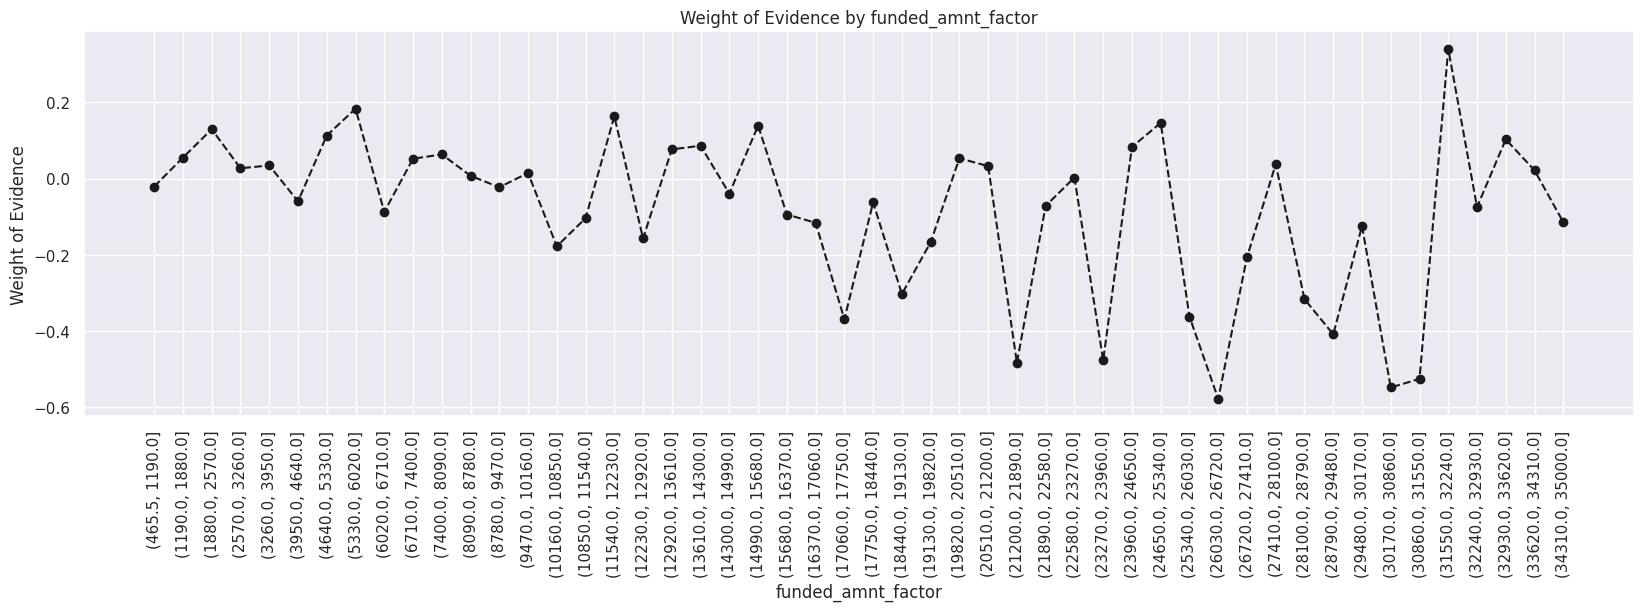

In [661]:
plot_by_woe(df_temp, 90)

The graph looks horizontal, so this variable will not be used.

In [662]:
df_inputs['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs['mths_since_earliest_cr_line'], 50 )
df_temp = woe_continuous(df_inputs , 'mths_since_earliest_cr_line_factor' , df_targets)
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-0.804, 16.08]      5   1.000000    0.000054     5.0   
1                      (16.08, 32.16]      0        NaN    0.000000     NaN   
2                      (32.16, 48.24]      0        NaN    0.000000     NaN   
3                      (48.24, 64.32]      0        NaN    0.000000     NaN   
4                       (64.32, 80.4]    122   0.909836    0.001308   111.0   
5                       (80.4, 96.48]    713   0.906031    0.007646   646.0   
6                     (96.48, 112.56]   1234   0.861426    0.013232  1063.0   
7                    (112.56, 128.64]   2695   0.866048    0.028899  2334.0   
8                    (128.64, 144.72]   4026   0.868356    0.043171  3496.0   
9                     (144.72, 160.8]   5087   0.889326    0.054548  4524.0   
10                    (160.8, 176.88]   6138   0.886445    0.065818  5441.0   
11                   (176.88, 192.96]   7449   0.886428    0.079876  6603.0   
12                   (192.96, 209.04]  10245   0.888921    0.109858  9107.0   
13                   (209.04, 225.12]   8784   0.885132    0.094191  7775.0   
14                    (225.12, 241.2]   7483   0.890686    0.080241  6665.0   
15                    (241.2, 257.28]   6284   0.892425    0.067384  5608.0   
16                   (257.28, 273.36]   5772   0.892758    0.061893  5153.0   
17                   (273.36, 289.44]   5214   0.899693    0.055910  4691.0   
18                   (289.44, 305.52]   3751   0.904825    0.040222  3394.0   
19                    (305.52, 321.6]   2744   0.905248    0.029424  2484.0   
20                    (321.6, 337.68]   2845   0.904745    0.030507  2574.0   
21                   (337.68, 353.76]   2512   0.903264    0.026936  2269.0   
22                   (353.76, 369.84]   2058   0.917881    0.022068  1889.0   
23                   (369.84, 385.92]   1585   0.909148    0.016996  1441.0   
24                    (385.92, 402.0]   1431   0.907058    0.015345  1298.0   
25                    (402.0, 418.08]   1190   0.921849    0.012760  1097.0   
26                   (418.08, 434.16]    780   0.908974    0.008364   709.0   
27                   (434.16, 450.24]    529   0.913043    0.005672   483.0   
28                   (450.24, 466.32]    512   0.929688    0.005490   476.0   
29                    (466.32, 482.4]    476   0.915966    0.005104   436.0   
30                    (482.4, 498.48]    378   0.915344    0.004053   346.0   
31                   (498.48, 514.56]    277   0.931408    0.002970   258.0   
32                   (514.56, 530.64]    206   0.917476    0.002209   189.0   
33                   (530.64, 546.72]    198   0.909091    0.002123   180.0   
34                    (546.72, 562.8]    134   0.910448    0.001437   122.0   
35                    (562.8, 578.88]    113   0.849558    0.001212    96.0   
36                   (578.88, 594.96]     69   0.898551    0.000740    62.0   
37                   (594.96, 611.04]     88   0.852273    0.000944    75.0   
38                   (611.04, 627.12]     43   0.813953    0.000461    35.0   
39                    (627.12, 643.2]     27   0.962963    0.000290    26.0   
40                    (643.2, 659.28]     28   0.892857    0.000300    25.0   
41                   (659.28, 675.36]      6   1.000000    0.000064     6.0   
42                   (675.36, 691.44]      9   0.888889    0.000097     8.0   
43                   (691.44, 707.52]      8   0.875000    0.000086     7.0   
44                    (707.52, 723.6]      5   0.800000    0.000054     4.0   
45                    (723.6, 739.68]      1   1.000000    0.000011     1.0   
46                   (739.68, 755.76]      0        NaN    0.000000     NaN   
47                   (755.76, 771.84]      2   1.000000    0.000021     2.0   
48                   (771.84, 787.92]      0        NaN    0.000000     NaN   
49                    (787.92, 804.0]      1   1.0000

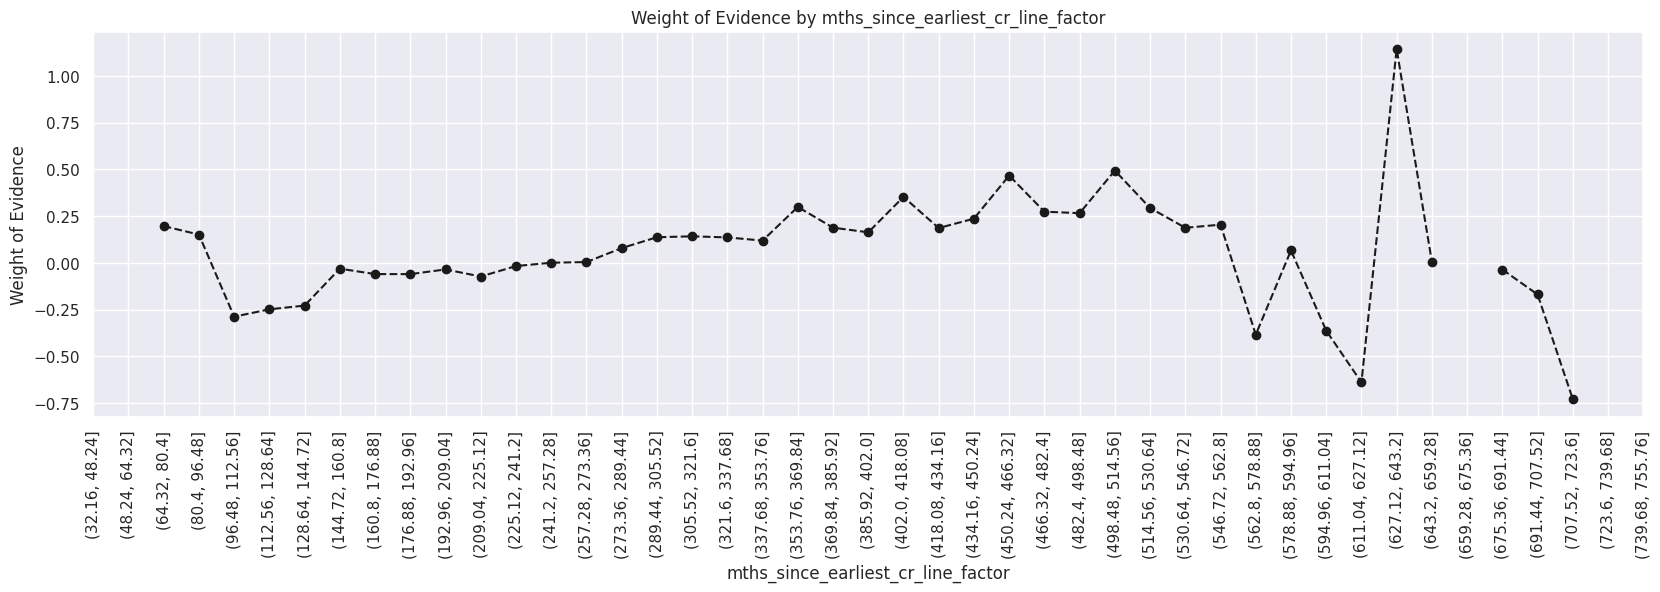

In [663]:
plot_by_woe(df_temp,90)

In [664]:
df_inputs['mths_since_earliest_cr_line:<140'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(140)), 1, 0) # Integer column, so I can use the range argument to create a list
df_inputs['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs['mths_since_earliest_cr_line:>352'] = np.where(df_inputs['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs['mths_since_earliest_cr_line'].max()))), 1, 0)

In [665]:
df_inputs['installment'].describe()

count    93257.000000
mean       431.990725
std        243.336808
min         15.760000
25%        256.940000
50%        379.920000
75%        567.300000
max       1407.010000
Name: installment, dtype: float64

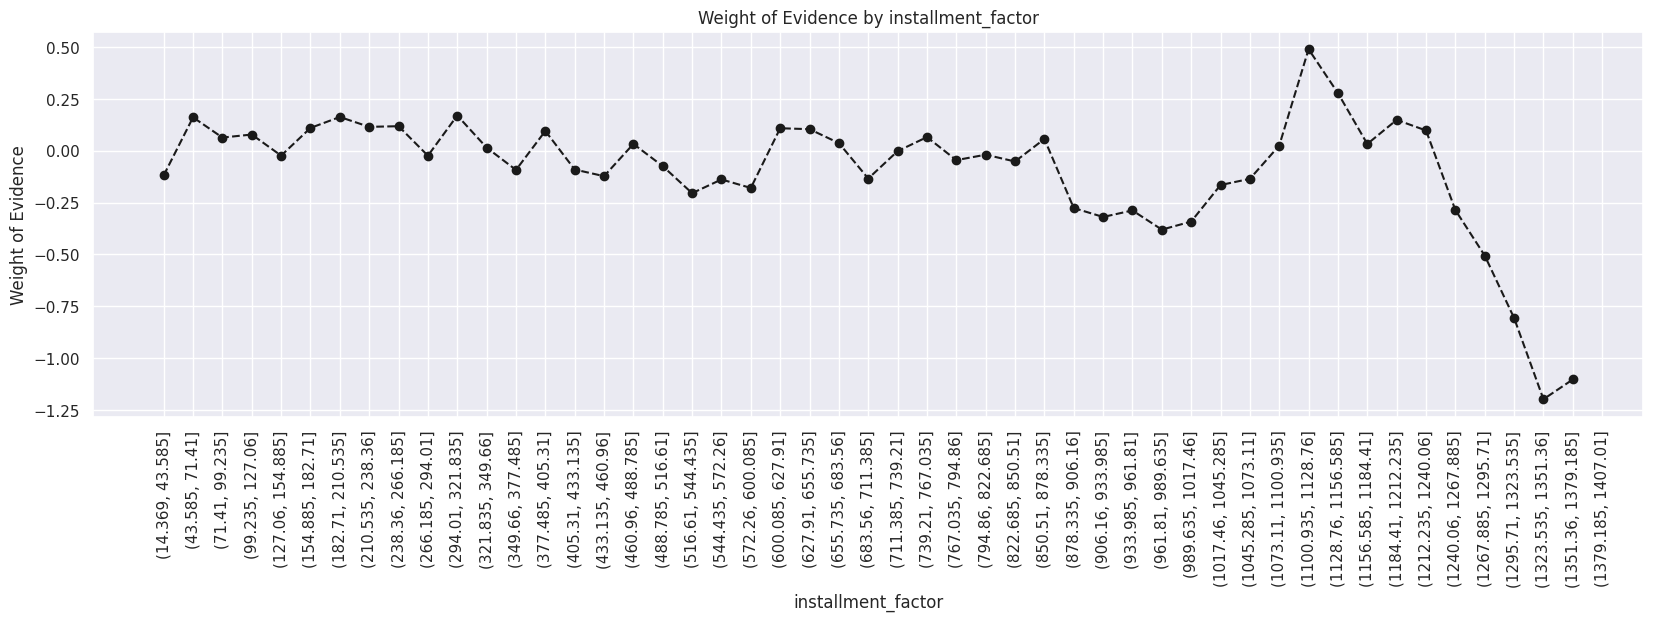

In [666]:
df_inputs['installment_factor'] = pd.cut(df_inputs['installment'],50)
df_temp = woe_continuous(df_inputs,'installment_factor',df_targets)
plot_by_woe(df_temp,90)

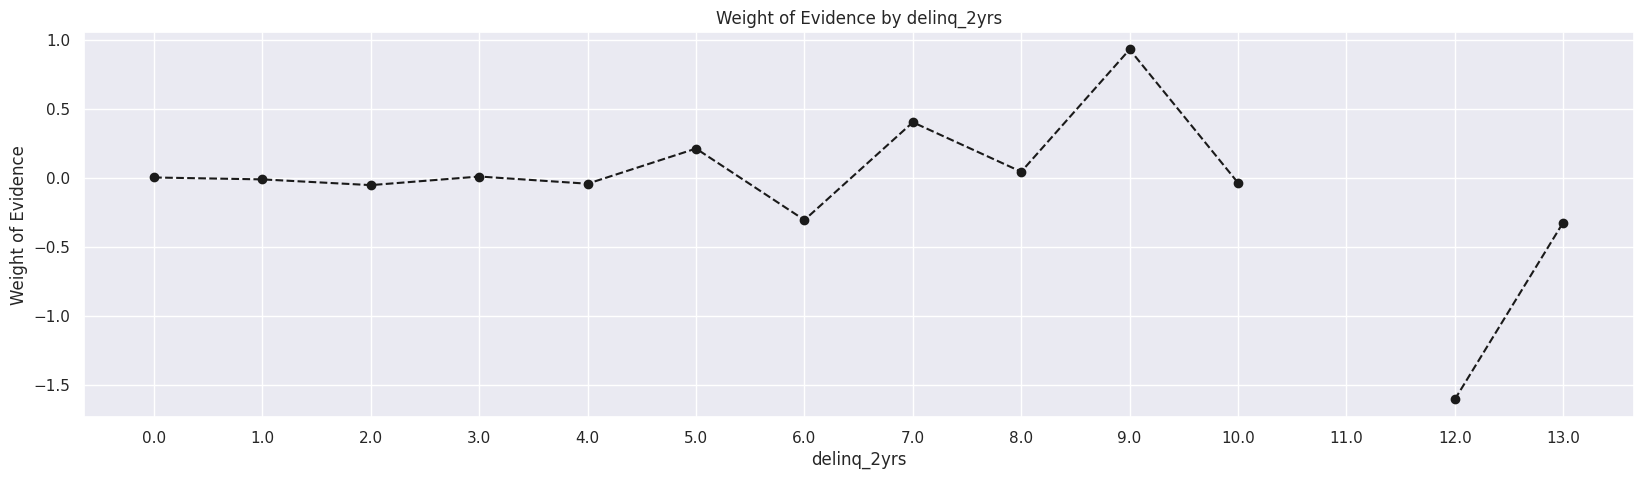

In [667]:
df_temp = woe_continuous( df_inputs,'delinq_2yrs', df_targets)
plot_by_woe(df_temp)

In [668]:
df_inputs['delinq_2yrs:0'] = np.where((df_inputs['delinq_2yrs'] == 0), 1, 0)
df_inputs['delinq_2yrs:1-3'] = np.where((df_inputs['delinq_2yrs'] >= 1) & (df_inputs['delinq_2yrs'] <= 3), 1, 0)
df_inputs['delinq_2yrs:>=4'] = np.where((df_inputs['delinq_2yrs'] >= 9), 1, 0)

In [669]:
df_inputs['inq_last_6mths'].describe()

count    93257.000000
mean         0.804036
std          1.085012
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         24.000000
Name: inq_last_6mths, dtype: float64

This should be an integer number

In [670]:
df_inputs['inq_last_6mths'].unique()

array([ 0.,  1.,  2.,  5.,  4.,  6.,  3.,  7.,  8., 11.,  9., 18., 19.,
       24., 10., 12., 13., 14.])

In [671]:
df_temp = woe_continuous(df_inputs , 'inq_last_6mths', df_targets)

In [672]:
df_temp

inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  48295   0.910260    0.517870  43961.0  4334.0   
1              1.0  25985   0.883009    0.278639  22945.0  3040.0   
2              2.0  11611   0.861941    0.124505  10008.0  1603.0   
3              3.0   5086   0.847621    0.054537   4311.0   775.0   
4              4.0   1431   0.869322    0.015345   1244.0   187.0   
5              5.0    551   0.889292    0.005908    490.0    61.0   
6              6.0    211   0.824645    0.002263    174.0    37.0   
7              7.0     36   0.888889    0.000386     32.0     4.0   
8              8.0     21   0.952381    0.000225     20.0     1.0   
9              9.0      7   1.000000    0.000075      7.0     0.0   
10            10.0      7   1.000000    0.000075      7.0     0.0   
11            11.0      7   1.000000    0.000075      7.0     0.0   
12            12.0      3   1.000000    0.000032      3.0     0.0   
13            13.0      1   1.000000    0.000011      1.0     0.0   
14            14.0      1   1.000000    0.000011      1.0     0.0   
15            18.0      2   1.000000    0.000021      2.0     0.0   
16            19.0      1   1.000000    0.000011      1.0     0.0   
17            24.0      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.528282    0.431587  0.202161             NaN       NaN  inf  
1      0.275732    0.302729 -0.093409        0.027250  0.295569  inf  
2      0.120267    0.159630 -0.283143        0.021068  0.189735  inf  
3      0.051806    0.077176 -0.398589        0.014320  0.115446  inf  
4      0.014949    0.018622 -0.219673        0.021701  0.178917  inf  
5      0.005888    0.006074 -0.031120        0.019970  0.188553  inf  
6      0.002091    0.003685 -0.566514        0.064648  0.535394  inf  
7      0.000385    0.000398 -0.035210        0.064244  0.531304  inf  
8      0.000240    0.000100  0.881081        0.063492  0.916291  inf  
9      0.000084    0.000000       inf        0.047619       inf  inf  
10     0.000084    0.000000       inf        0.000000       NaN  inf  
11     0.000084    0.000000       inf        0.000000       NaN  inf  
12     0.000036    0.000000       inf        0.000000       NaN  inf  
13     0.000012    0.000000       inf        0.000000       NaN  inf  
14     0.000012    0.000000       inf        0.000000       NaN  inf  
15     0.000024    0.000000       inf        0.000000       NaN  inf  
16     0.000012    0.000000       inf        0.000000       NaN  inf  
17     0.000012    0.000000       inf        0.000000       NaN  inf

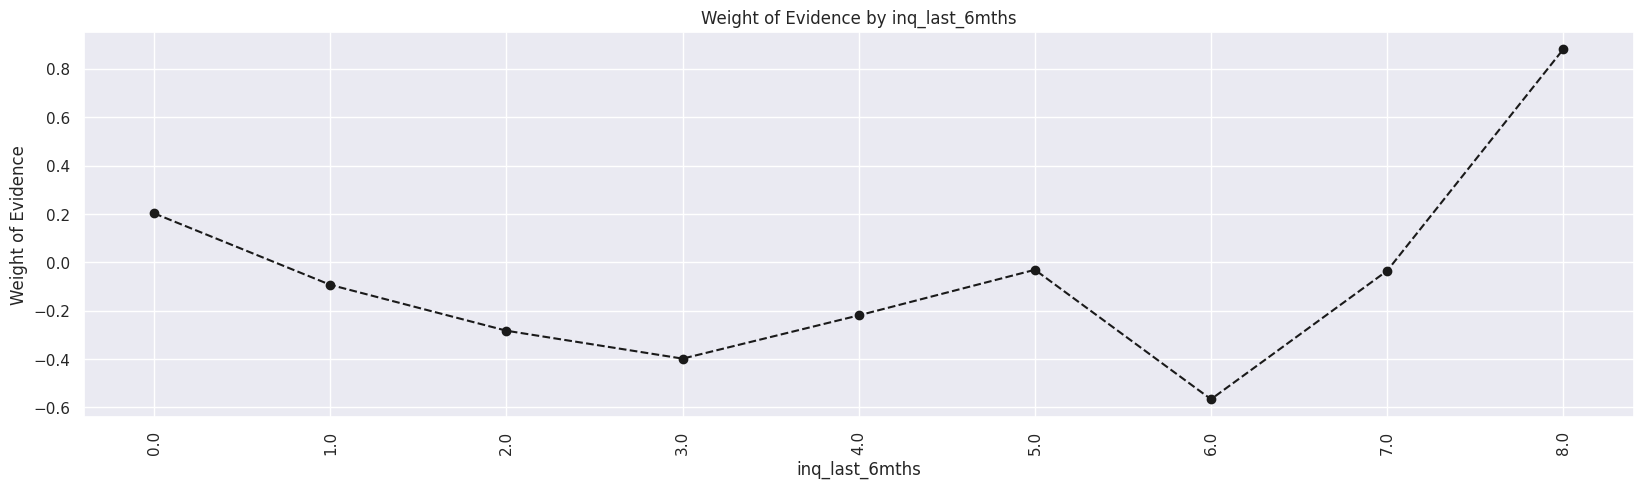

In [673]:
plot_by_woe(df_temp,90)

In [674]:
df_inputs['inq_last_6mths:0'] = np.where((df_inputs['inq_last_6mths'] == 0), 1, 0)
df_inputs['inq_last_6mths:1-2'] = np.where((df_inputs['inq_last_6mths'] >= 1) & (df_inputs['inq_last_6mths'] <= 2), 1, 0)
df_inputs['inq_last_6mths:3-6'] = np.where((df_inputs['inq_last_6mths'] >= 3) & (df_inputs['inq_last_6mths'] <= 6), 1, 0)
df_inputs['inq_last_6mths:>6'] = np.where((df_inputs['inq_last_6mths'] > 6), 1, 0)

In [675]:
df_inputs['open_acc'].describe()

count    93257.000000
mean        11.189551
std          5.003941
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         61.000000
Name: open_acc, dtype: float64

In [676]:
df_inputs['open_acc'].unique()

array([ 7., 18.,  9., 12.,  5., 22.,  3., 17., 16.,  6., 10., 20., 23.,
       13.,  4., 15., 14., 11., 19., 24., 21.,  8., 31., 26.,  1., 32.,
       37., 27., 25.,  2., 28., 29., 30., 39., 34., 33., 35., 36., 40.,
        0., 38., 53., 48., 52., 46., 42., 45., 43., 58., 41., 49., 61.,
       50.])

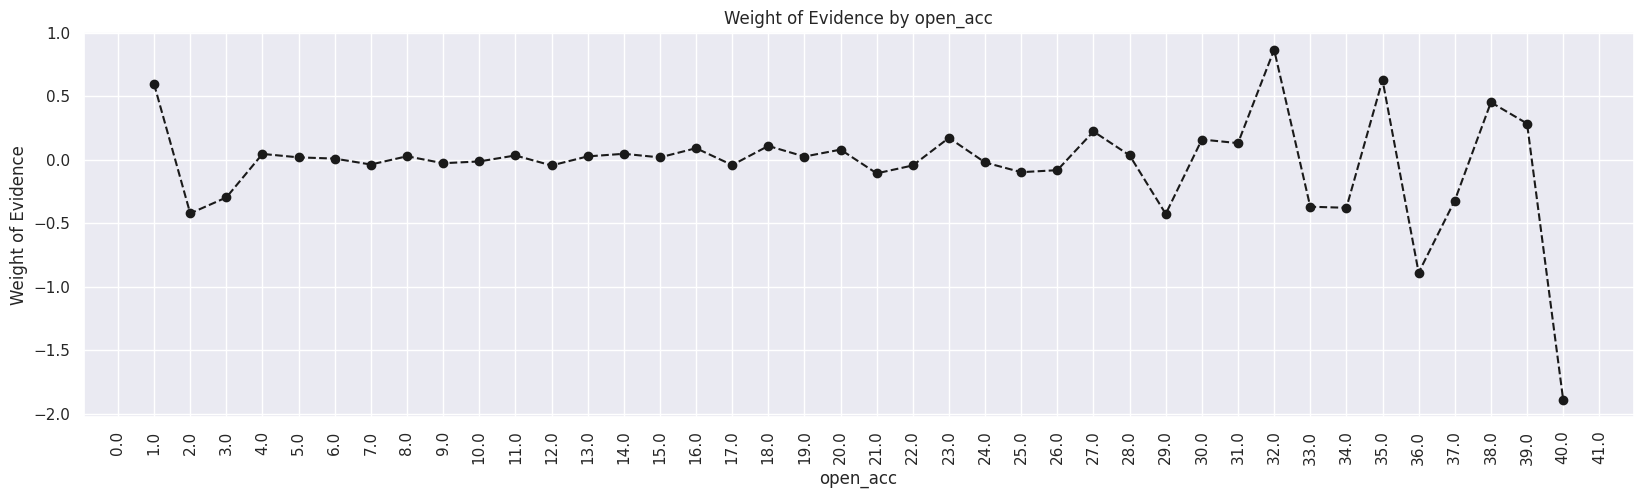

In [677]:
df_temp = woe_continuous(df_inputs, 'open_acc', df_targets)
plot_by_woe(df_temp, 90)

In [678]:
df_temp

open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        0.0      7   1.000000    0.000075     7.0    0.0     0.000084   
1        1.0     32   0.937500    0.000343    30.0    2.0     0.000361   
2        2.0    334   0.844311    0.003582   282.0   52.0     0.003389   
3        3.0   1122   0.860071    0.012031   965.0  157.0     0.011596   
4        4.0   2560   0.896484    0.027451  2295.0  265.0     0.027579   
5        5.0   4403   0.893936    0.047214  3936.0  467.0     0.047299   
6        6.0   6216   0.893018    0.066655  5551.0  665.0     0.066707   
7        7.0   7433   0.888470    0.079704  6604.0  829.0     0.079361   
8        8.0   8314   0.894756    0.089151  7439.0  875.0     0.089395   
9        9.0   8768   0.889484    0.094020  7799.0  969.0     0.093721   
10      10.0   8576   0.890858    0.091961  7640.0  936.0     0.091810   
11      11.0   7740   0.895349    0.082996  6930.0  810.0     0.083278   
12      12.0   6886   0.887743    0.073839  6113.0  773.0     0.073460   
13      13.0   5914   0.894657    0.063416  5291.0  623.0     0.063582   
14      14.0   4960   0.896573    0.053186  4447.0  513.0     0.053440   
15      15.0   4006   0.893909    0.042957  3581.0  425.0     0.043033   
16      16.0   3269   0.900581    0.035054  2944.0  325.0     0.035378   
17      17.0   2680   0.888060    0.028738  2380.0  300.0     0.028601   
18      18.0   2259   0.902169    0.024223  2038.0  221.0     0.024491   
19      19.0   1811   0.894533    0.019419  1620.0  191.0     0.019468   
20      20.0   1444   0.899584    0.015484  1299.0  145.0     0.015610   
21      21.0   1037   0.881389    0.011120   914.0  123.0     0.010984   
22      22.0    784   0.887755    0.008407   696.0   88.0     0.008364   
23      23.0    628   0.907643    0.006734   570.0   58.0     0.006850   
24      24.0    473   0.890063    0.005072   421.0   52.0     0.005059   
25      25.0    391   0.882353    0.004193   345.0   46.0     0.004146   
26      26.0    250   0.884000    0.002681   221.0   29.0     0.002656   
27      27.0    204   0.911765    0.002188   186.0   18.0     0.002235   
28      28.0    153   0.895425    0.001641   137.0   16.0     0.001646   
29      29.0    128   0.843750    0.001373   108.0   20.0     0.001298   
30      30.0    107   0.906542    0.001147    97.0   10.0     0.001166   
31      31.0     73   0.904110    0.000783    66.0    7.0     0.000793   
32      32.0     62   0.951613    0.000665    59.0    3.0     0.000709   
33      33.0     47   0.851064    0.000504    40.0    7.0     0.000481   
34      34.0     40   0.850000    0.000429    34.0    6.0     0.000409   
35      35.0     33   0.939394    0.000354    31.0    2.0     0.000373   
36      36.0     22   0.772727    0.000236    17.0    5.0     0.000204   
37      37.0     21   0.857143    0.000225    18.0    3.0     0.000216   
38      38.0     14   0.928571    0.000150    13.0    1.0     0.000156   
39      39.0     12   0.916667    0.000129    11.0    1.0     0.000132   
40      40.0      9   0.555556    0.000097     5.0    4.0     0.000060   
41      41.0      6   1.000000    0.000064     6.0    0.0     0.000072   
42      42.0      7   1.000000    0.000075     7.0    0.0     0.000084   
43      43.0      4   1.000000    0.000043     4.0    0.0     0.000048   
44      45.0      4   1.000000    0.000043     4.0    0.0     0.000048   
45      46.0      2   1.000000    0.000021     2.0    0.0     0.000024   
46      48.0      2   1.000000    0.000021     2.0    0.0     0.000024   
47      49.0      2   1.000000    0.000021     2.0    0.0     0.000024   
48      50.0      1   1.000000    0.000011     1.0    0.0     0.000012   
49      52.0      1   1.000000    0.000011     1.0    0.0     0.000012   
50      53.0      2   1.000000    0.000021     2.0    0.0     0.000024   
51      58.0      3   1.000000    0.000032     3.0    0.0     0.000036   
52      61.0      1   1.000000    0.000011     1.0    0.0     0.000012   

    pro

In [679]:
df_inputs['open_acc:0'] = np.where((df_inputs['open_acc'] == 0), 1, 0)
df_inputs['open_acc:1-3'] = np.where((df_inputs['open_acc'] >= 1) & (df_inputs['open_acc'] <= 3), 1, 0)
df_inputs['open_acc:4-12'] = np.where((df_inputs['open_acc'] >= 4) & (df_inputs['open_acc'] <= 12), 1, 0)
df_inputs['open_acc:13-17'] = np.where((df_inputs['open_acc'] >= 13) & (df_inputs['open_acc'] <= 17), 1, 0)
df_inputs['open_acc:18-22'] = np.where((df_inputs['open_acc'] >= 18) & (df_inputs['open_acc'] <= 22), 1, 0)
df_inputs['open_acc:23-25'] = np.where((df_inputs['open_acc'] >= 23) & (df_inputs['open_acc'] <= 25), 1, 0)
df_inputs['open_acc:26-30'] = np.where((df_inputs['open_acc'] >= 26) & (df_inputs['open_acc'] <= 30), 1, 0)
df_inputs['open_acc:>=31'] = np.where((df_inputs['open_acc'] >= 31), 1, 0)

In [680]:
df_inputs['pub_rec'].describe()

count    93257.000000
mean         0.161918
std          0.514721
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         49.000000
Name: pub_rec, dtype: float64

In [681]:
df_inputs['pub_rec'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5., 12., 49.,  7.,  6.,  8., 14., 11.,
       10.,  9.])

In [682]:
df_temp = woe_continuous(df_inputs, 'pub_rec' , df_targets)
df_temp

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0       0.0  80923   0.890810    0.867742  72087.0  8836.0     0.866274   
1       1.0  10670   0.902624    0.114415   9631.0  1039.0     0.115736   
2       2.0   1097   0.904284    0.011763    992.0   105.0     0.011921   
3       3.0    331   0.900302    0.003549    298.0    33.0     0.003581   
4       4.0    112   0.857143    0.001201     96.0    16.0     0.001154   
5       5.0     73   0.904110    0.000783     66.0     7.0     0.000793   
6       6.0     19   0.894737    0.000204     17.0     2.0     0.000204   
7       7.0     14   0.785714    0.000150     11.0     3.0     0.000132   
8       8.0      5   0.800000    0.000054      4.0     1.0     0.000048   
9       9.0      2   1.000000    0.000021      2.0     0.0     0.000024   
10     10.0      3   1.000000    0.000032      3.0     0.0     0.000036   
11     11.0      5   1.000000    0.000054      5.0     0.0     0.000060   
12     12.0      1   1.000000    0.000011      1.0     0.0     0.000012   
13     14.0      1   1.000000    0.000011      1.0     0.0     0.000012   
14     49.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.879904 -0.015612             NaN       NaN  inf  
1     0.103465  0.112077        0.011814  0.127689  inf  
2     0.010456  0.131111        0.001660  0.019034  inf  
3     0.003286  0.085935        0.003982  0.045177  inf  
4     0.001593 -0.322892        0.043159  0.408826  inf  
5     0.000697  0.129093        0.046967  0.451985  inf  
6     0.000199  0.025415        0.009373  0.103678  inf  
7     0.000299 -0.815368        0.109023  0.840783  inf  
8     0.000100 -0.728357        0.014286  0.087011  inf  
9     0.000000       inf        0.200000       inf  inf  
10    0.000000       inf        0.000000       NaN  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf

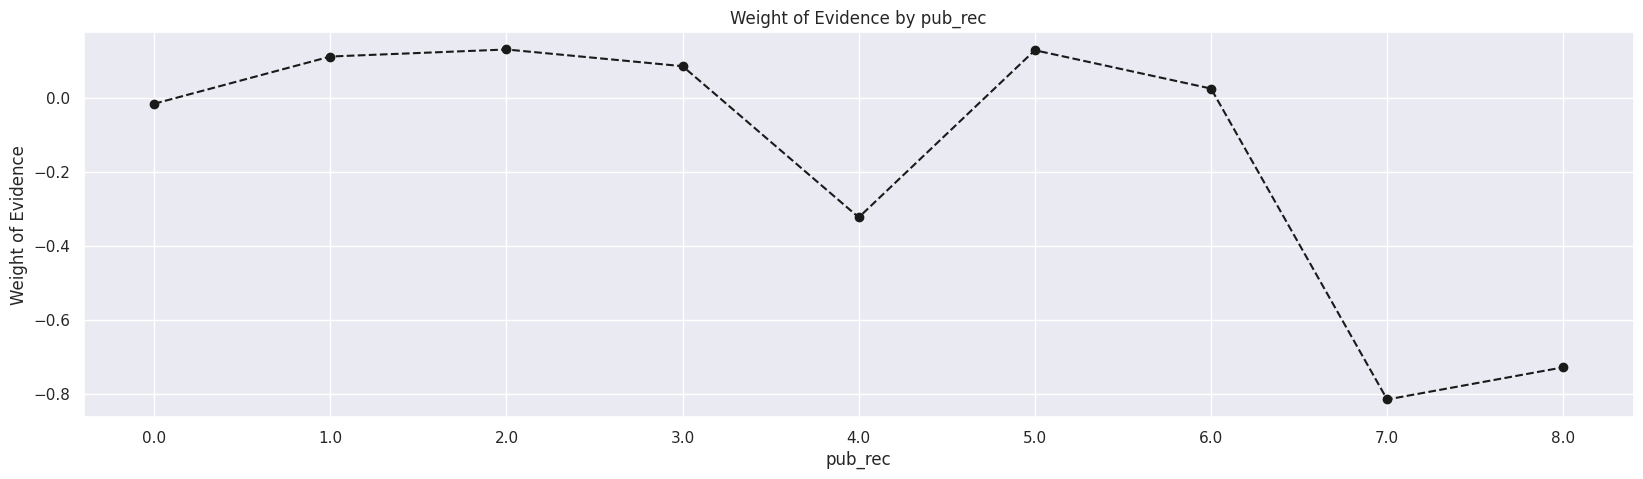

In [683]:
plot_by_woe(df_temp)

In [684]:
df_inputs['pub_rec:0-2'] = np.where((df_inputs['pub_rec']>=0) & (df_inputs['pub_rec'] <=2) , 1 , 0)
df_inputs['pub_rec:0'] = np.where((df_inputs['pub_rec']>=0) & (df_inputs['pub_rec'] <=2) , 1 , 0)
df_inputs['pub_rec:3-4'] = np.where((df_inputs['pub_rec'] >= 3) & (df_inputs['pub_rec'] <= 4), 1, 0)
df_inputs['pub_rec:>=5'] = np.where((df_inputs['pub_rec'] >= 5), 1, 0)

In [685]:
df_inputs['total_acc'].describe()

count    93257.000000
mean        25.069764
std         11.607568
min          0.000000
25%         17.000000
50%         23.000000
75%         32.000000
max        156.000000
Name: total_acc, dtype: float64

In [686]:
df_inputs['total_acc'].unique()

array([ 20.,  43.,  38.,  31.,  36.,  48.,  10.,  45.,   5.,  32.,  26.,
        41.,  40.,  47.,   8.,  14.,  42.,  24.,   6.,  23.,  17.,  11.,
        25.,  21.,  28.,  29.,  12.,  37.,  19.,  35.,  34.,  30.,  18.,
        13.,   9.,  44.,  50.,  22.,  33.,  59.,  16.,  15.,  27.,  39.,
        46.,  63.,   7.,  52.,  56.,  54.,  49.,   4.,  57.,  60.,  53.,
        67.,  51.,  55.,  65.,  61., 156.,   3.,  66.,  58.,  80.,  64.,
        62.,  73.,  71.,  72.,  91.,  79.,  69.,   2.,  78.,   0.,  81.,
        92.,  74.,  70.,  77.,  75.,  68.,  76.,  85.,  88.,  94.,  97.,
         1.,  99.,  86.,  89.,  84.,  83.,  82.,  93.])

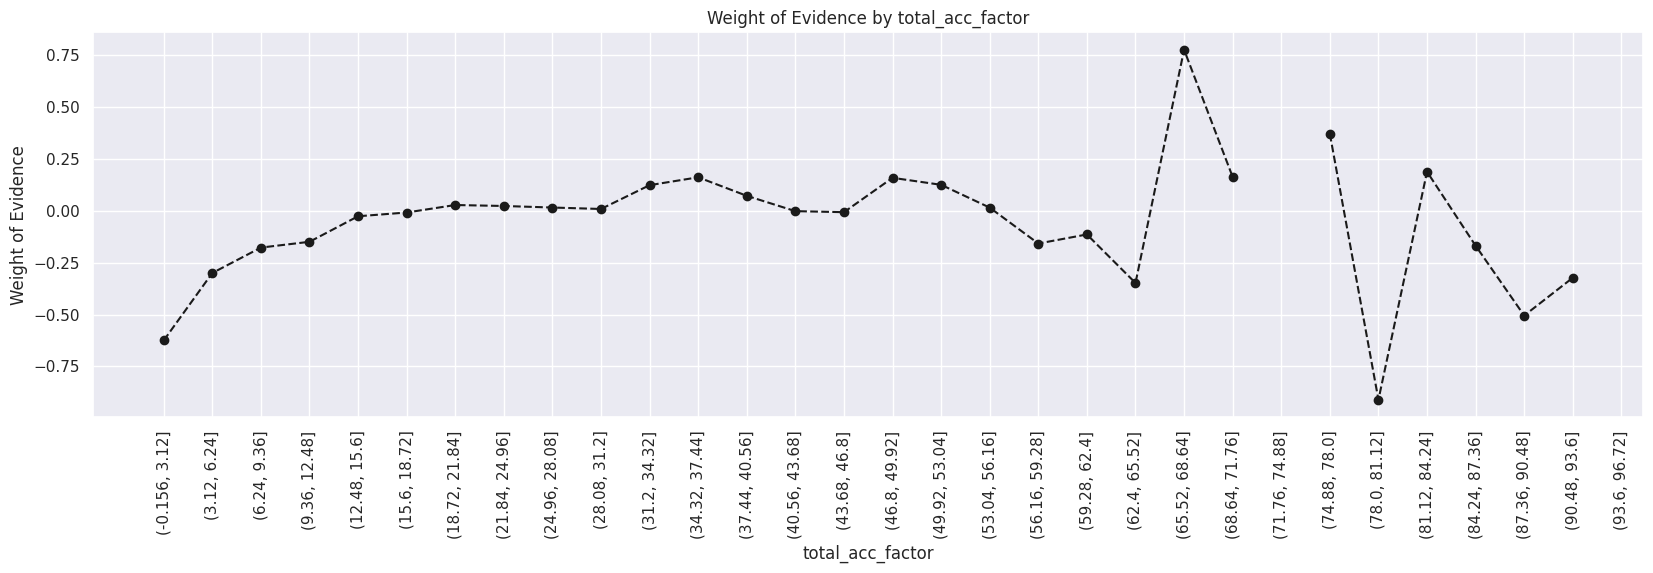

In [687]:
df_inputs['total_acc_factor'] = pd.cut(df_inputs['total_acc'],50)
df_temp = woe_continuous(df_inputs, 'total_acc_factor', df_targets)
plot_by_woe(df_temp, 90)

In [688]:
df_inputs['total_acc:<=27'] = np.where((df_inputs['total_acc'] <= 27), 1, 0)
df_inputs['total_acc:28-51'] = np.where((df_inputs['total_acc'] >= 28) & (df_inputs['total_acc'] <= 51), 1, 0)
df_inputs['total_acc:>=52'] = np.where((df_inputs['total_acc'] >= 52), 1, 0)

In [689]:
df_inputs['acc_now_delinq'].describe()

count    93257.000000
mean         0.004461
std          0.071904
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: acc_now_delinq, dtype: float64

In [690]:
df_inputs['acc_now_delinq'].unique()

array([0., 1., 2., 3.])

In [691]:
df_temp = woe_continuous(df_inputs, 'acc_now_delinq', df_targets)
df_temp

acc_now_delinq  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0             0.0  92871   0.892421    0.995861  82880.0  9991.0     0.995974   
1             1.0    360   0.872222    0.003860    314.0    46.0     0.003773   
2             2.0     22   0.818182    0.000236     18.0     4.0     0.000216   
3             3.0      4   0.750000    0.000043      3.0     1.0     0.000036   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.994921  0.001058             NaN       NaN  0.000333  
1    0.004581 -0.193900        0.020198  0.194958  0.000333  
2    0.000398 -0.610574        0.054040  0.416674  0.000333  
3    0.000100 -1.016039        0.068182  0.405465  0.000333

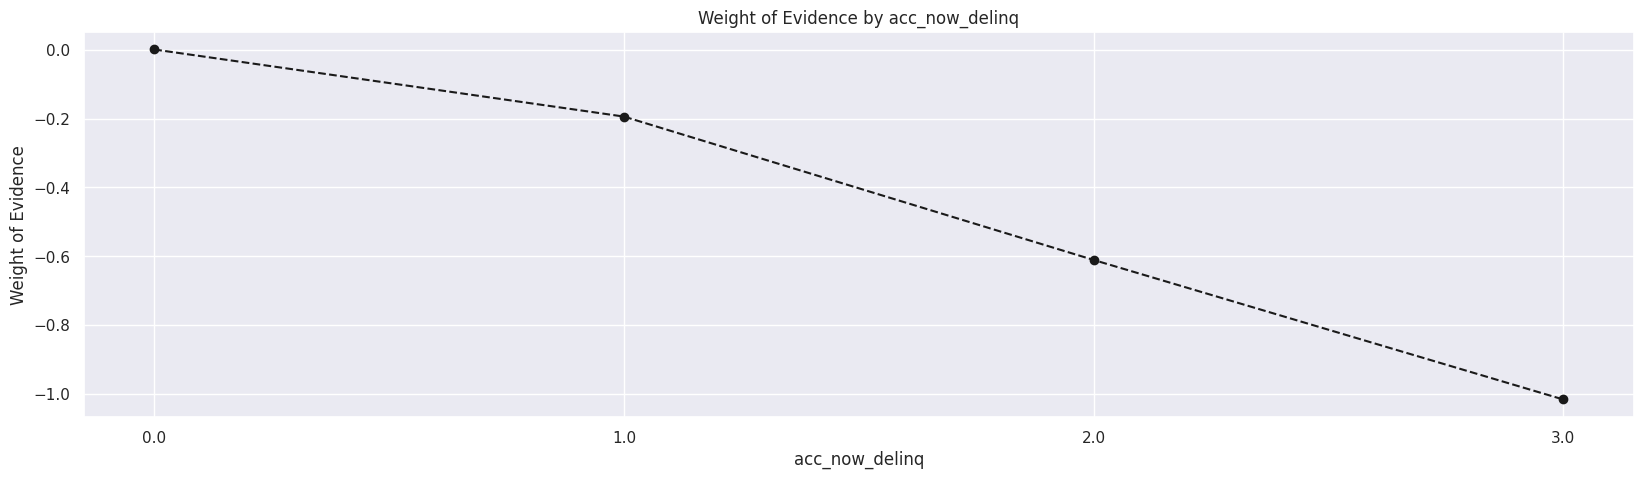

In [692]:
plot_by_woe(df_temp)

In [693]:
df_inputs['acc_now_delinq:0'] = np.where((df_inputs['acc_now_delinq'] == 0), 1, 0)
df_inputs['acc_now_delinq:>=1'] = np.where((df_inputs['acc_now_delinq'] >= 1), 1, 0)

In [694]:
df_inputs['total_rev_hi_lim'].describe()

count    9.325700e+04
mean     2.758552e+04
std      2.939144e+04
min      0.000000e+00
25%      1.150000e+04
50%      2.010000e+04
75%      3.450000e+04
max      2.013133e+06
Name: total_rev_hi_lim, dtype: float64

In [695]:
df_inputs['total_rev_hi_lim'].unique()

array([25100., 24000., 30000., ..., 61299., 21188., 13962.])

In [696]:
#Too much unique results, need to cut
df_inputs['total_rev_hi_lim_factor'] = pd.cut( df_inputs['total_rev_hi_lim'], 2000 )
df_temp = woe_continuous(df_inputs, 'total_rev_hi_lim_factor', df_targets)
df_temp

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0          (-2013.133, 1006.566]    238   0.848739    0.002552   202.0   36.0   
1           (1006.566, 2013.133]    678   0.834808    0.007270   566.0  112.0   
2             (2013.133, 3019.7]   1121   0.857270    0.012021   961.0  160.0   
3             (3019.7, 4026.266]   1461   0.883641    0.015666  1291.0  170.0   
4           (4026.266, 5032.832]   2163   0.878410    0.023194  1900.0  263.0   
...                          ...    ...        ...         ...     ...    ...   
1995  (2008100.168, 2009106.734]      0        NaN    0.000000     NaN    NaN   
1996  (2009106.734, 2010113.301]      0        NaN    0.000000     NaN    NaN   
1997  (2010113.301, 2011119.867]      0        NaN    0.000000     NaN    NaN   
1998  (2011119.867, 2012126.434]      0        NaN    0.000000     NaN    NaN   
1999    (2012126.434, 2013133.0]      1   1.000000    0.000011     1.0    0.0   

      prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0        0.002427    0.003585 -0.389903             NaN       NaN  inf  
1        0.006802    0.011153 -0.494556        0.013931  0.104654  inf  
2        0.011548    0.015933 -0.321851        0.022462  0.172705  inf  
3        0.015514    0.016929 -0.087277        0.026371  0.234573  inf  
4        0.022832    0.026190 -0.137196        0.005232  0.049919  inf  
...           ...         ...       ...             ...       ...  ...  
1995          NaN         NaN       NaN             NaN       NaN  inf  
1996          NaN         NaN       NaN             NaN       NaN  inf  
1997          NaN         NaN       NaN             NaN       NaN  inf  
1998          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.000012    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

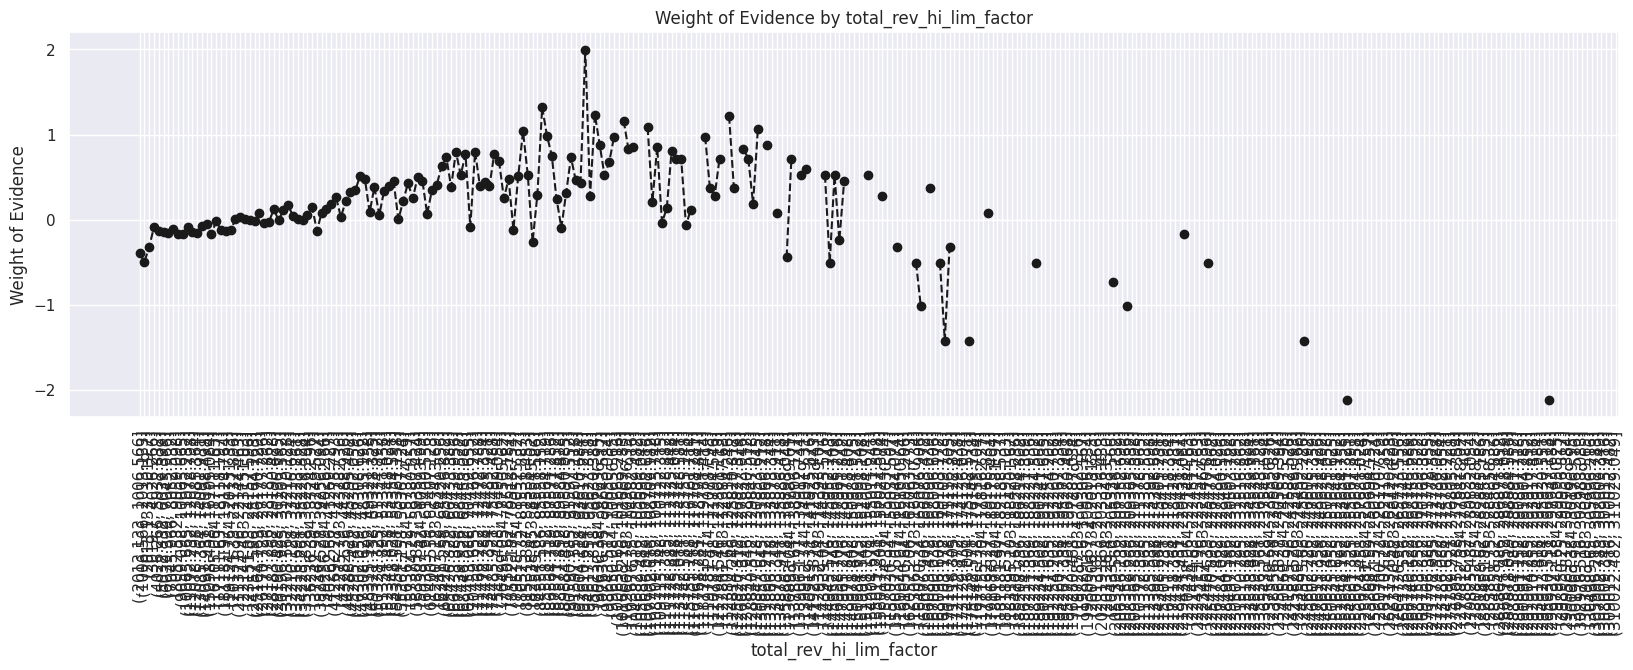

In [697]:
plot_by_woe(df_temp,90)

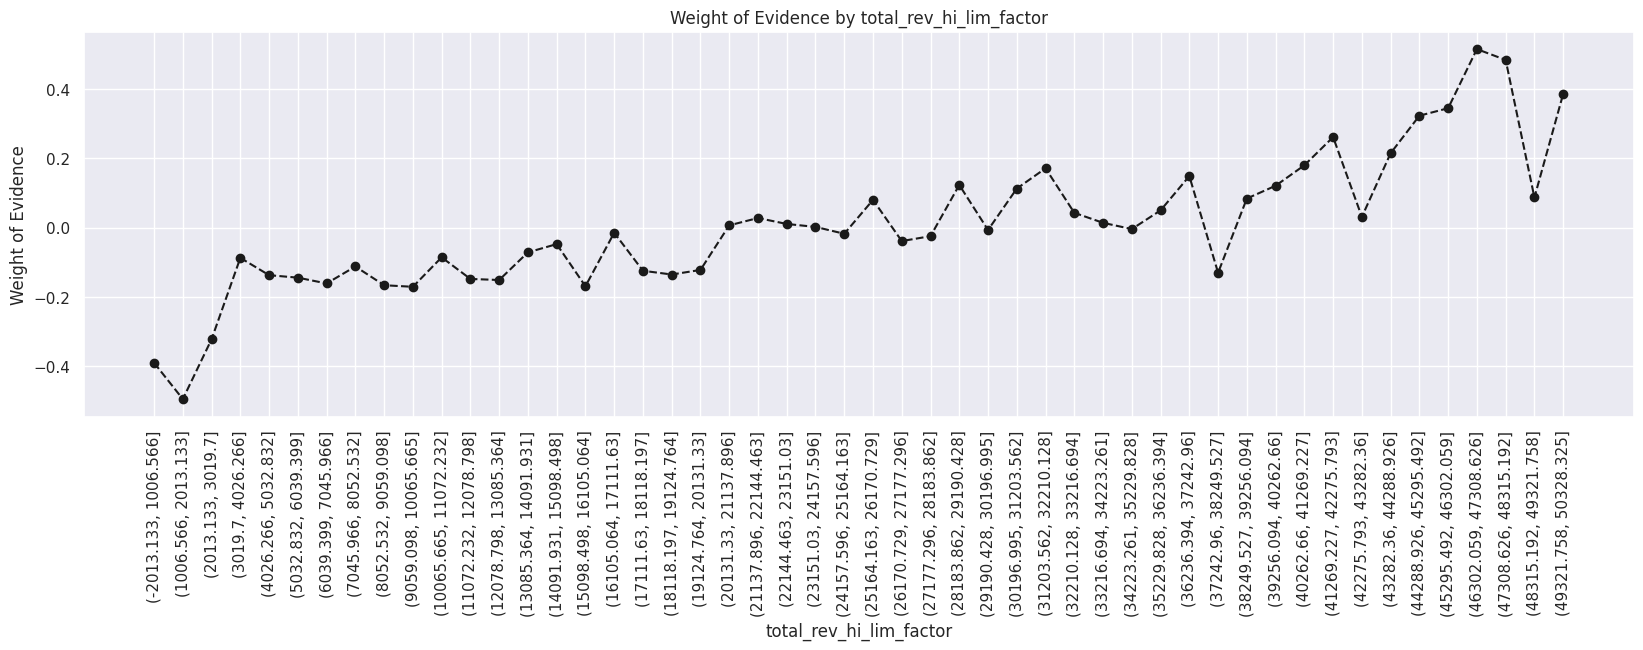

In [698]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [699]:
df_inputs['total_rev_hi_lim:<=5K'] = np.where((df_inputs['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs['total_rev_hi_lim:5K-10K'] = np.where((df_inputs['total_rev_hi_lim'] > 5000) & (df_inputs['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs['total_rev_hi_lim:10K-20K'] = np.where((df_inputs['total_rev_hi_lim'] > 10000) & (df_inputs['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs['total_rev_hi_lim:20K-30K'] = np.where((df_inputs['total_rev_hi_lim'] > 20000) & (df_inputs['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs['total_rev_hi_lim:30K-40K'] = np.where((df_inputs['total_rev_hi_lim'] > 30000) & (df_inputs['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs['total_rev_hi_lim:40K-55K'] = np.where((df_inputs['total_rev_hi_lim'] > 40000) & (df_inputs['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs['total_rev_hi_lim:55K-95K'] = np.where((df_inputs['total_rev_hi_lim'] > 55000) & (df_inputs['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs['total_rev_hi_lim:>95K'] = np.where((df_inputs['total_rev_hi_lim'] > 95000), 1, 0)

In [700]:
df_inputs['annual_inc'].describe()

count    9.325700e+04
mean     7.349199e+04
std      5.978793e+04
min      4.800000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.900000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [701]:
df_inputs['annual_inc'].unique()

array([ 65000.,  60000., 175000., ...,  81961.,  29310.,  47939.])

In [702]:
df_inputs['annual_inc_factor'] = pd.cut(df_inputs['annual_inc'],50)
df_temp = woe_continuous(df_inputs, 'annual_inc_factor', df_targets)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-2695.2, 154704.0]  89203   0.890598    0.956529  79444.0  9759.0   
1     (154704.0, 304608.0]   3626   0.929123    0.038882   3369.0   257.0   
2     (304608.0, 454512.0]    282   0.929078    0.003024    262.0    20.0   
3     (454512.0, 604416.0]     86   0.965116    0.000922     83.0     3.0   
4     (604416.0, 754320.0]     23   0.956522    0.000247     22.0     1.0   
5     (754320.0, 904224.0]     18   0.944444    0.000193     17.0     1.0   
6    (904224.0, 1054128.0]      7   1.000000    0.000075      7.0     0.0   
7   (1054128.0, 1204032.0]      6   1.000000    0.000064      6.0     0.0   
8   (1204032.0, 1353936.0]      2   0.500000    0.000021      1.0     1.0   
9   (1353936.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
10  (1503840.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
11  (1653744.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
12  (1803648.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
13  (1953552.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
14  (2103456.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
15  (2253360.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
16  (2403264.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
17  (2553168.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
18  (2703072.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
19  (2852976.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
20  (3002880.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
21  (3152784.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
22  (3302688.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
23  (3452592.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
24  (3602496.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
25  (3752400.0, 3902304.0]      0        NaN    0.000000      NaN     NaN   
26  (3902304.0, 4052208.0]      0        NaN    0.000000      NaN     NaN   
27  (4052208.0, 4202112.0]      0        NaN    0.000000      NaN     NaN   
28  (4202112.0, 4352016.0]      0        NaN    0.000000      NaN     NaN   
29  (4352016.0, 4501920.0]      0        NaN    0.000000      NaN     NaN   
30  (4501920.0, 4651824.0]      0        NaN    0.000000      NaN     NaN   
31  (4651824.0, 4801728.0]      0        NaN    0.000000      NaN     NaN   
32  (4801728.0, 4951632.0]      0        NaN    0.000000      NaN     NaN   
33  (4951632.0, 5101536.0]      0        NaN    0.000000      NaN     NaN   
34  (5101536.0, 5251440.0]      0        NaN    0.000000      NaN     NaN   
35  (5251440.0, 5401344.0]      0        NaN    0.000000      NaN     NaN   
36  (5401344.0, 5551248.0]      0        NaN    0.000000      NaN     NaN   
37  (5551248.0, 5701152.0]      0        NaN    0.000000      NaN     NaN   
38  (5701152.0, 5851056.0]      0        NaN    0.000000      NaN     NaN   
39  (5851056.0, 6000960.0]      0        NaN    0.000000      NaN     NaN   
40  (6000960.0, 6150864.0]      0        NaN    0.000000      NaN     NaN   
41  (6150864.0, 6300768.0]      0        NaN    0.000000      NaN     NaN   
42  (6300768.0, 6450672.0]      0        NaN    0.000000      NaN     NaN   
43  (6450672.0, 6600576.0]      0        NaN    0.000000      NaN     NaN   
44  (6600576.0, 6750480.0]      0        NaN    0.000000      NaN     NaN   
45  (6750480.0, 6900384.0]      0        NaN    0.000000      NaN     NaN   
46  (6900384.0, 7050288.0]      0        NaN    0.000000      NaN     NaN   
47  (7050288.0, 7200192.0]      0        NaN    0.000000      NaN     NaN   
48  (7200192.0, 7350096.0]      0        NaN    0.000000      NaN     NaN   
49  (7350096.0, 7500000.0]      2   1.000000    0.000021      2.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.9

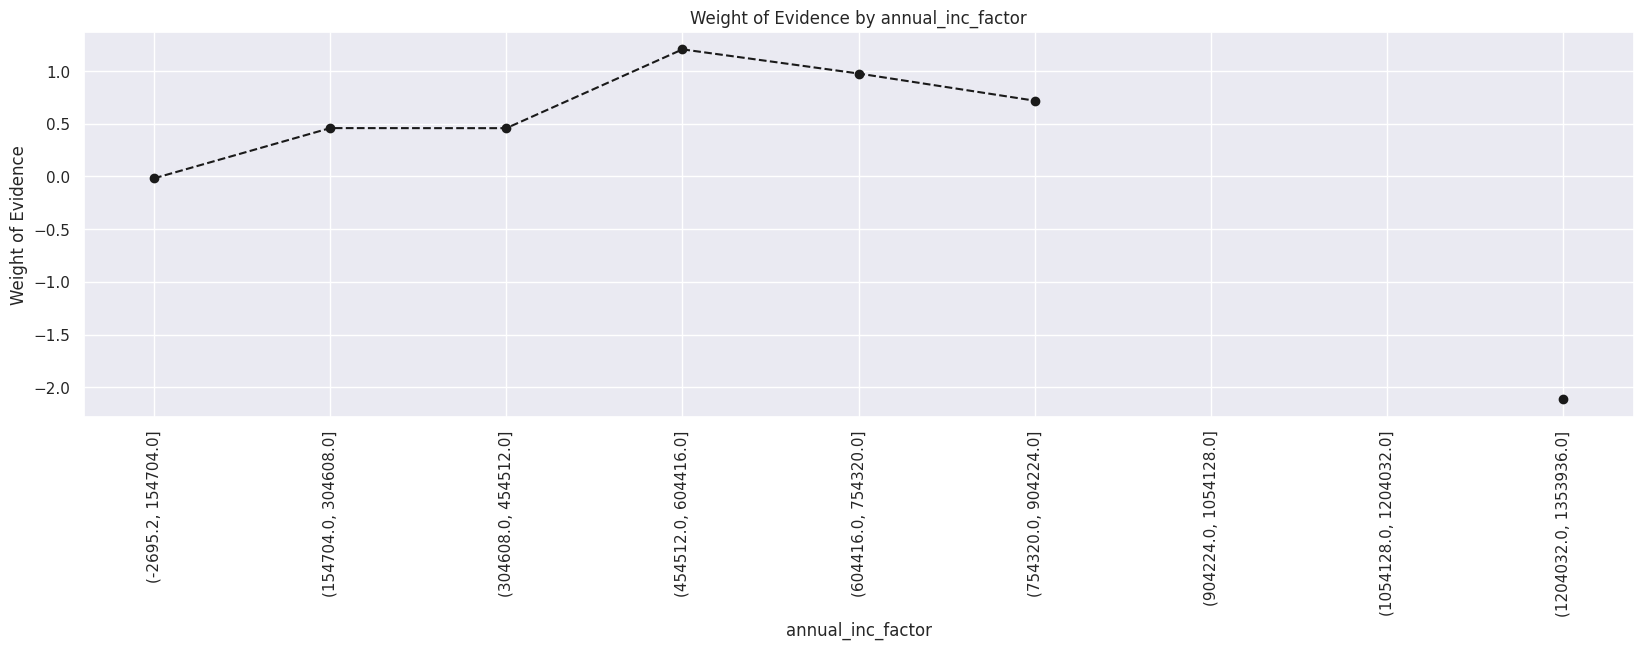

In [703]:
plot_by_woe(df_temp,90)

In [704]:
df_inputs['annual_inc:<20K'] = np.where((df_inputs['annual_inc'] <= 20000), 1, 0)
df_inputs['annual_inc:20K-30K'] = np.where((df_inputs['annual_inc'] > 20000) & (df_inputs['annual_inc'] <= 30000), 1, 0)
df_inputs['annual_inc:30K-40K'] = np.where((df_inputs['annual_inc'] > 30000) & (df_inputs['annual_inc'] <= 40000), 1, 0)
df_inputs['annual_inc:40K-50K'] = np.where((df_inputs['annual_inc'] > 40000) & (df_inputs['annual_inc'] <= 50000), 1, 0)
df_inputs['annual_inc:50K-60K'] = np.where((df_inputs['annual_inc'] > 50000) & (df_inputs['annual_inc'] <= 60000), 1, 0)
df_inputs['annual_inc:60K-70K'] = np.where((df_inputs['annual_inc'] > 60000) & (df_inputs['annual_inc'] <= 70000), 1, 0)
df_inputs['annual_inc:70K-80K'] = np.where((df_inputs['annual_inc'] > 70000) & (df_inputs['annual_inc'] <= 80000), 1, 0)
df_inputs['annual_inc:80K-90K'] = np.where((df_inputs['annual_inc'] > 80000) & (df_inputs['annual_inc'] <= 90000), 1, 0)
df_inputs['annual_inc:90K-100K'] = np.where((df_inputs['annual_inc'] > 90000) & (df_inputs['annual_inc'] <= 100000), 1, 0)
df_inputs['annual_inc:100K-120K'] = np.where((df_inputs['annual_inc'] > 100000) & (df_inputs['annual_inc'] <= 120000), 1, 0)
df_inputs['annual_inc:120K-140K'] = np.where((df_inputs['annual_inc'] > 120000) & (df_inputs['annual_inc'] <= 140000), 1, 0)
df_inputs['annual_inc:>140K'] = np.where((df_inputs['annual_inc'] > 140000), 1, 0)

In [705]:
df_inputs['mths_since_last_delinq'].describe()

count    43091.000000
mean        34.132533
std         21.811442
min          0.000000
25%         16.000000
50%         31.000000
75%         50.000000
max        170.000000
Name: mths_since_last_delinq, dtype: float64

In [706]:
df_inputs['mths_since_last_delinq'].unique()

array([ nan,   3.,  41.,  39.,  12.,  73.,  26.,  40.,  68.,  63.,   0.,
        46.,  58.,  72.,  75.,  20.,  52.,  38.,  33.,  44.,  22.,   2.,
        16.,  47.,  42.,  76.,  37.,  30.,  13.,  35.,  71.,  43.,  61.,
        15.,   7.,  25.,   9.,  21.,  28.,  59.,  14.,  31.,  34.,  18.,
        51.,  77.,  79.,  45.,  32.,   8.,  24.,   1.,  54.,  60.,  49.,
        11.,  53.,  29.,  69.,  62.,  78.,  19.,  23.,  36.,  81.,   5.,
        27.,  17.,  55.,   6.,  64.,  56.,  70.,  48.,   4.,  57.,  50.,
        10.,  80.,  67.,  83.,  65.,  74.,  82.,  66.,  88.,  84., 143.,
       107.,  85., 122.,  90.,  95.,  86., 170.,  87., 131., 101., 103.,
        99.,  97., 118., 110., 119., 135.,  96., 121., 106., 124., 105.,
       113.])

In [707]:
df_inputs_temp = df_inputs[pd.notnull(df_inputs['mths_since_last_delinq'])] # taking out of the samples the missing values or 'nan'
df_inputs_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_temp['mths_since_last_delinq'], 50)
df_temp = woe_continuous(df_inputs_temp, 'mths_since_last_delinq_factor', df_targets[df_inputs_temp.index])
df_temp

<ipython-input-707-9f03bb319bd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_temp['mths_since_last_delinq'], 50)


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.17, 3.4]   1348   0.887982    0.031283  1197.0  151.0   
1                     (3.4, 6.8]   1890   0.882011    0.043861  1667.0  223.0   
2                    (6.8, 10.2]   3373   0.887341    0.078276  2993.0  380.0   
3                   (10.2, 13.6]   2496   0.897035    0.057924  2239.0  257.0   
4                   (13.6, 17.0]   3165   0.885308    0.073449  2802.0  363.0   
5                   (17.0, 20.4]   2282   0.894829    0.052958  2042.0  240.0   
6                   (20.4, 23.8]   2115   0.898818    0.049082  1901.0  214.0   
7                   (23.8, 27.2]   2755   0.896552    0.063934  2470.0  285.0   
8                   (27.2, 30.6]   1929   0.897356    0.044766  1731.0  198.0   
9                   (30.6, 34.0]   2453   0.892784    0.056926  2190.0  263.0   
10                  (34.0, 37.4]   1786   0.905935    0.041447  1618.0  168.0   
11                  (37.4, 40.8]   1765   0.888952    0.040960  1569.0  196.0   
12                  (40.8, 44.2]   2270   0.878414    0.052679  1994.0  276.0   
13                  (44.2, 47.6]   1664   0.900240    0.038616  1498.0  166.0   
14                  (47.6, 51.0]   1739   0.889017    0.040356  1546.0  193.0   
15                  (51.0, 54.4]   1158   0.887737    0.026873  1028.0  130.0   
16                  (54.4, 57.8]   1130   0.912389    0.026224  1031.0   99.0   
17                  (57.8, 61.2]   1423   0.897400    0.033023  1277.0  146.0   
18                  (61.2, 64.6]   1015   0.892611    0.023555   906.0  109.0   
19                  (64.6, 68.0]   1342   0.892697    0.031143  1198.0  144.0   
20                  (68.0, 71.4]    930   0.886022    0.021582   824.0  106.0   
21                  (71.4, 74.8]    928   0.889009    0.021536   825.0  103.0   
22                  (74.8, 78.2]   1195   0.911297    0.027732  1089.0  106.0   
23                  (78.2, 81.6]    768   0.880208    0.017823   676.0   92.0   
24                  (81.6, 85.0]    136   0.904412    0.003156   123.0   13.0   
25                  (85.0, 88.4]     10   1.000000    0.000232    10.0    0.0   
26                  (88.4, 91.8]      1   1.000000    0.000023     1.0    0.0   
27                  (91.8, 95.2]      2   1.000000    0.000046     2.0    0.0   
28                  (95.2, 98.6]      3   0.666667    0.000070     2.0    1.0   
29                 (98.6, 102.0]      4   1.000000    0.000093     4.0    0.0   
30                (102.0, 105.4]      2   1.000000    0.000046     2.0    0.0   
31                (105.4, 108.8]      3   1.000000    0.000070     3.0    0.0   
32                (108.8, 112.2]      1   1.000000    0.000023     1.0    0.0   
33                (112.2, 115.6]      1   1.000000    0.000023     1.0    0.0   
34                (115.6, 119.0]      2   1.000000    0.000046     2.0    0.0   
35                (119.0, 122.4]      2   1.000000    0.000046     2.0    0.0   
36                (122.4, 125.8]      1   1.000000    0.000023     1.0    0.0   
37                (125.8, 129.2]      0        NaN    0.000000     NaN    NaN   
38                (129.2, 132.6]      1   1.000000    0.000023     1.0    0.0   
39                (132.6, 136.0]      1   1.000000    0.000023     1.0    0.0   
40                (136.0, 139.4]      0        NaN    0.000000     NaN    NaN   
41                (139.4, 142.8]      0        NaN    0.000000     NaN    NaN   
42                (142.8, 146.2]      1   1.000000    0.000023     1.0    0.0   
43                (146.2, 149.6]      0        NaN    0.000000     NaN    NaN   
44                (149.6, 153.0]      0        NaN    0.000000     NaN    NaN   
45                (153.0, 156.4]      0        NaN    0.000000     NaN    NaN   
46                (156.4, 159.8]      0        NaN    0.000000     NaN    NaN   
47                (159.8, 163.2]      0        NaN    0.000000     NaN    NaN   
48                (163.2, 166.6]  

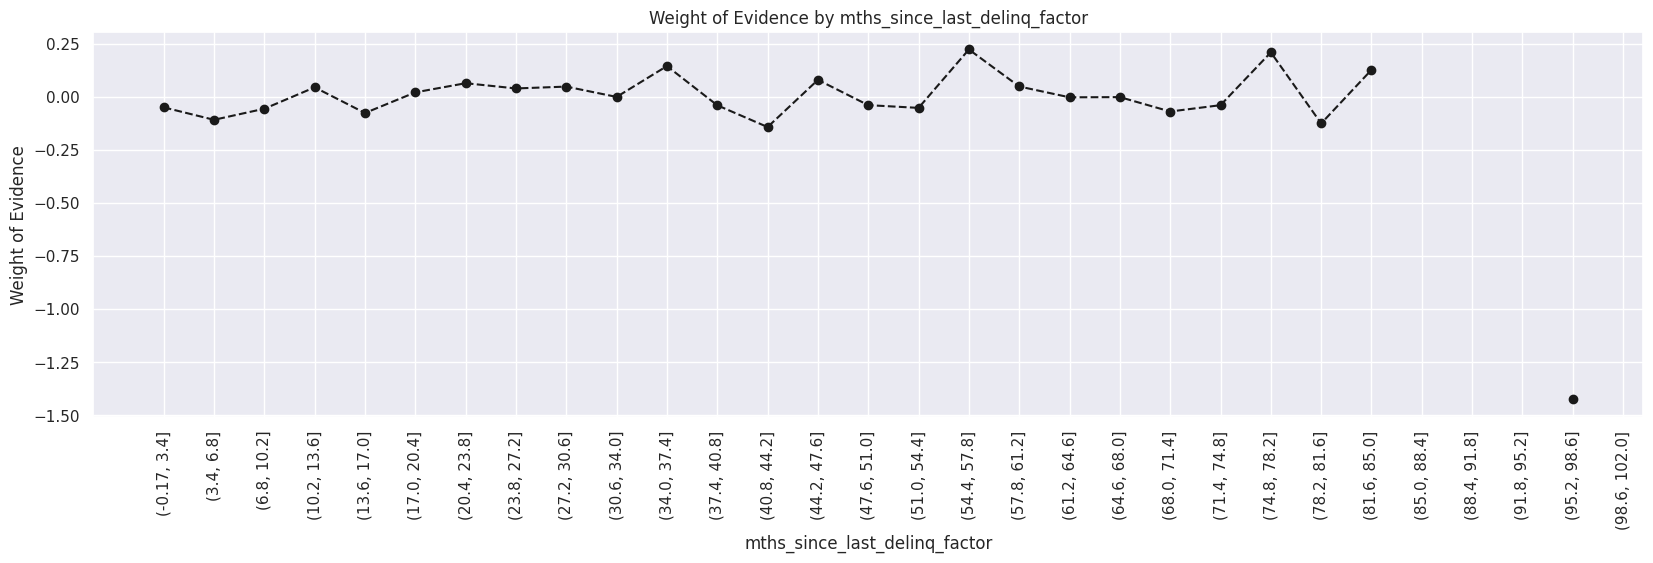

In [708]:
plot_by_woe(df_temp, 90)

In [709]:
df_inputs['mths_since_last_delinq:Missing'] = np.where((df_inputs['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs['mths_since_last_delinq:0-3'] = np.where((df_inputs['mths_since_last_delinq'] >= 0) & (df_inputs['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs['mths_since_last_delinq:4-30'] = np.where((df_inputs['mths_since_last_delinq'] >= 4) & (df_inputs['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs['mths_since_last_delinq:31-56'] = np.where((df_inputs['mths_since_last_delinq'] >= 31) & (df_inputs['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs['mths_since_last_delinq:>=57'] = np.where((df_inputs['mths_since_last_delinq'] >= 57), 1, 0)

In [710]:
df_inputs['dti_factor'] = pd.cut(df_inputs['dti'], 100)
df_temp = woe_continuous(df_inputs, 'dti_factor', df_targets)
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    187   0.919786    0.002005   172.0   15.0   
1         (0.4, 0.8]    184   0.885870    0.001973   163.0   21.0   
2         (0.8, 1.2]    223   0.892377    0.002391   199.0   24.0   
3         (1.2, 1.6]    255   0.913725    0.002734   233.0   22.0   
4         (1.6, 2.0]    315   0.901587    0.003378   284.0   31.0   
5       (2.0, 2.399]    324   0.916667    0.003474   297.0   27.0   
6     (2.399, 2.799]    366   0.918033    0.003925   336.0   30.0   
7     (2.799, 3.199]    442   0.914027    0.004740   404.0   38.0   
8     (3.199, 3.599]    484   0.933884    0.005190   452.0   32.0   
9     (3.599, 3.999]    563   0.909414    0.006037   512.0   51.0   
10    (3.999, 4.399]    599   0.923205    0.006423   553.0   46.0   
11    (4.399, 4.799]    661   0.906203    0.007088   599.0   62.0   
12    (4.799, 5.199]    706   0.909348    0.007570   642.0   64.0   
13    (5.199, 5.599]    821   0.919610    0.008804   755.0   66.0   
14    (5.599, 5.999]    841   0.898930    0.009018   756.0   85.0   
15    (5.999, 6.398]    889   0.912261    0.009533   811.0   78.0   
16    (6.398, 6.798]    978   0.937628    0.010487   917.0   61.0   
17    (6.798, 7.198]   1021   0.905975    0.010948   925.0   96.0   
18    (7.198, 7.598]   1057   0.907285    0.011334   959.0   98.0   
19    (7.598, 7.998]   1170   0.913675    0.012546  1069.0  101.0   
20    (7.998, 8.398]   1172   0.908703    0.012567  1065.0  107.0   
21    (8.398, 8.798]   1127   0.913043    0.012085  1029.0   98.0   
22    (8.798, 9.198]   1281   0.917252    0.013736  1175.0  106.0   
23    (9.198, 9.598]   1309   0.902215    0.014036  1181.0  128.0   
24    (9.598, 9.998]   1371   0.913202    0.014701  1252.0  119.0   
25   (9.998, 10.397]   1429   0.913926    0.015323  1306.0  123.0   
26  (10.397, 10.797]   1521   0.907955    0.016310  1381.0  140.0   
27  (10.797, 11.197]   1555   0.909968    0.016674  1415.0  140.0   
28  (11.197, 11.597]   1597   0.899812    0.017125  1437.0  160.0   
29  (11.597, 11.997]   1554   0.909266    0.016664  1413.0  141.0   
30  (11.997, 12.397]   1607   0.897946    0.017232  1443.0  164.0   
31  (12.397, 12.797]   1719   0.906923    0.018433  1559.0  160.0   
32  (12.797, 13.197]   1614   0.918216    0.017307  1482.0  132.0   
33  (13.197, 13.597]   1717   0.907397    0.018411  1558.0  159.0   
34  (13.597, 13.997]   1707   0.893966    0.018304  1526.0  181.0   
35  (13.997, 14.396]   1724   0.903132    0.018487  1557.0  167.0   
36  (14.396, 14.796]   1773   0.895093    0.019012  1587.0  186.0   
37  (14.796, 15.196]   1755   0.899715    0.018819  1579.0  176.0   
38  (15.196, 15.596]   1695   0.897935    0.018176  1522.0  173.0   
39  (15.596, 15.996]   1752   0.903539    0.018787  1583.0  169.0   
40  (15.996, 16.396]   1653   0.903206    0.017725  1493.0  160.0   
41  (16.396, 16.796]   1689   0.894020    0.018111  1510.0  179.0   
42  (16.796, 17.196]   1770   0.899435    0.018980  1592.0  178.0   
43  (17.196, 17.596]   1708   0.885831    0.018315  1513.0  195.0   
44  (17.596, 17.996]   1680   0.901190    0.018015  1514.0  166.0   
45  (17.996, 18.395]   1671   0.901257    0.017918  1506.0  165.0   
46  (18.395, 18.795]   1638   0.903541    0.017564  1480.0  158.0   
47  (18.795, 19.195]   1628   0.882064    0.017457  1436.0  192.0   
48  (19.195, 19.595]   1606   0.887298    0.017221  1425.0  181.0   
49  (19.595, 19.995]   1603   0.884591    0.017189  1418.0  185.0   
50  (19.995, 20.395]   1512   0.888889    0.016213  1344.0  168.0   
51  (20.395, 20.795]   1656   0.882246    0.017757  1461.0  195.0   
52  (20.795, 21.195]   1505   0.885714    0.016138  1333.0  172.0   
53  (21.195, 21.595]   1455   0.879725    0.015602  1280.0  175.0   
54  (21.595, 21.995]   1452   0.884298    0.015570  1284.0  168.0   
55  (21.995, 22.394]   1394   0.870158    0.014948  1213.0  181.0   
56  (22.394, 22.794]   1309   0.862490    0.014036  1129.0  180.0   
57  (22.

In [711]:
df_inputs_temp = df_inputs.loc[df_inputs['dti'] <= 35, : ]

In [712]:
df_inputs['dti:<=1.4'] = np.where((df_inputs['dti'] <= 1.4), 1, 0)
df_inputs['dti:1.4-3.5'] = np.where((df_inputs['dti'] > 1.4) & (df_inputs['dti'] <= 3.5), 1, 0)
df_inputs['dti:3.5-7.7'] = np.where((df_inputs['dti'] > 3.5) & (df_inputs['dti'] <= 7.7), 1, 0)
df_inputs['dti:7.7-10.5'] = np.where((df_inputs['dti'] > 7.7) & (df_inputs['dti'] <= 10.5), 1, 0)
df_inputs['dti:10.5-16.1'] = np.where((df_inputs['dti'] > 10.5) & (df_inputs['dti'] <= 16.1), 1, 0)
df_inputs['dti:16.1-20.3'] = np.where((df_inputs['dti'] > 16.1) & (df_inputs['dti'] <= 20.3), 1, 0)
df_inputs['dti:20.3-21.7'] = np.where((df_inputs['dti'] > 20.3) & (df_inputs['dti'] <= 21.7), 1, 0)
df_inputs['dti:21.7-22.4'] = np.where((df_inputs['dti'] > 21.7) & (df_inputs['dti'] <= 22.4), 1, 0)
df_inputs['dti:22.4-35'] = np.where((df_inputs['dti'] > 22.4) & (df_inputs['dti'] <= 35), 1, 0)
df_inputs['dti:>35'] = np.where((df_inputs['dti'] > 35), 1, 0)

In [713]:
df_inputs_prepr_temp = df_inputs[pd.notnull(df_inputs['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets[df_inputs_prepr_temp.index])
df_temp

<ipython-input-713-47d16a870d9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    244   0.881148    0.019410   215.0   29.0   
1                   (2.58, 5.16]     36   0.888889    0.002864    32.0    4.0   
2                   (5.16, 7.74]     39   0.923077    0.003102    36.0    3.0   
3                  (7.74, 10.32]     66   0.939394    0.005250    62.0    4.0   
4                  (10.32, 12.9]     42   0.833333    0.003341    35.0    7.0   
5                  (12.9, 15.48]     69   0.869565    0.005489    60.0    9.0   
6                 (15.48, 18.06]     95   0.873684    0.007557    83.0   12.0   
7                 (18.06, 20.64]     58   0.965517    0.004614    56.0    2.0   
8                 (20.64, 23.22]    101   0.891089    0.008034    90.0   11.0   
9                  (23.22, 25.8]     94   0.946809    0.007478    89.0    5.0   
10                 (25.8, 28.38]    135   0.896296    0.010739   121.0   14.0   
11                (28.38, 30.96]    103   0.922330    0.008193    95.0    8.0   
12                (30.96, 33.54]    196   0.923469    0.015591   181.0   15.0   
13                (33.54, 36.12]    195   0.907692    0.015512   177.0   18.0   
14                 (36.12, 38.7]    166   0.909639    0.013205   151.0   15.0   
15                 (38.7, 41.28]    234   0.905983    0.018614   212.0   22.0   
16                (41.28, 43.86]    194   0.896907    0.015432   174.0   20.0   
17                (43.86, 46.44]    328   0.917683    0.026092   301.0   27.0   
18                (46.44, 49.02]    367   0.920981    0.029194   338.0   29.0   
19                 (49.02, 51.6]    231   0.948052    0.018376   219.0   12.0   
20                 (51.6, 54.18]    447   0.926174    0.035558   414.0   33.0   
21                (54.18, 56.76]    264   0.897727    0.021001   237.0   27.0   
22                (56.76, 59.34]    393   0.928753    0.031262   365.0   28.0   
23                (59.34, 61.92]    287   0.909408    0.022830   261.0   26.0   
24                 (61.92, 64.5]    405   0.920988    0.032217   373.0   32.0   
25                 (64.5, 67.08]    394   0.961929    0.031342   379.0   15.0   
26                (67.08, 69.66]    272   0.893382    0.021637   243.0   29.0   
27                (69.66, 72.24]    366   0.912568    0.029115   334.0   32.0   
28                (72.24, 74.82]    231   0.922078    0.018376   213.0   18.0   
29                 (74.82, 77.4]    350   0.920000    0.027842   322.0   28.0   
30                 (77.4, 79.98]    228   0.903509    0.018137   206.0   22.0   
31                (79.98, 82.56]    355   0.898592    0.028240   319.0   36.0   
32                (82.56, 85.14]    288   0.916667    0.022910   264.0   24.0   
33                (85.14, 87.72]    251   0.836653    0.019967   210.0   41.0   
34                 (87.72, 90.3]    345   0.895652    0.027444   309.0   36.0   
35                 (90.3, 92.88]    249   0.847390    0.019807   211.0   38.0   
36                (92.88, 95.46]    385   0.867532    0.030626   334.0   51.0   
37                (95.46, 98.04]    401   0.877805    0.031899   352.0   49.0   
38               (98.04, 100.62]    327   0.874618    0.026012   286.0   41.0   
39               (100.62, 103.2]    526   0.884030    0.041842   465.0   61.0   
40               (103.2, 105.78]    396   0.891414    0.031501   353.0   43.0   
41              (105.78, 108.36]    565   0.886726    0.044945   501.0   64.0   
42              (108.36, 110.94]    407   0.911548    0.032376   371.0   36.0   
43              (110.94, 113.52]    524   0.887405    0.041683   465.0   59.0   
44               (113.52, 116.1]    515   0.908738    0.040967   468.0   47.0   
45               (116.1, 118.68]    314   0.882166    0.024978   277.0   37.0   
46              (118.68, 121.26]     92   0.847826    0.007318    78.0   14.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

In [714]:
df_inputs['mths_since_last_record:Missing'] = np.where((df_inputs['mths_since_last_record'].isnull()), 1, 0)
df_inputs['mths_since_last_record:0-2'] = np.where((df_inputs['mths_since_last_record'] >= 0) & (df_inputs['mths_since_last_record'] <= 2), 1, 0)
df_inputs['mths_since_last_record:3-20'] = np.where((df_inputs['mths_since_last_record'] >= 3) & (df_inputs['mths_since_last_record'] <= 20), 1, 0)
df_inputs['mths_since_last_record:21-31'] = np.where((df_inputs['mths_since_last_record'] >= 21) & (df_inputs['mths_since_last_record'] <= 31), 1, 0)
df_inputs['mths_since_last_record:32-80'] = np.where((df_inputs['mths_since_last_record'] >= 32) & (df_inputs['mths_since_last_record'] <= 80), 1, 0)
df_inputs['mths_since_last_record:81-86'] = np.where((df_inputs['mths_since_last_record'] >= 81) & (df_inputs['mths_since_last_record'] <= 86), 1, 0)
df_inputs['mths_since_last_record:>=86'] = np.where((df_inputs['mths_since_last_record'] >= 86), 1, 0)

# Exporting the data frame created with all variables into the train and test data

In [715]:
#df_loan_train = df_inputs
df_loan_test = df_inputs

In [716]:
df_loan_train.to_csv('/content/drive/MyDrive/Python/df_loan_train.csv')
df_loan_train_target.to_csv('/content/drive/MyDrive/Python/df_loan_train_target.csv')
df_loan_test.to_csv('/content/drive/MyDrive/Python/df_loan_test.csv')
df_loan_test_target.to_csv('/content/drive/MyDrive/Python/df_loan_test_target.csv')